a. Directory Structure (notebooks for testing and src once build complete)


By grouping:

    Viewpoint and court functions into their own modules,
    Plot initialization and element creation into a common module,
    Animation update logic into one (or two) modules (with a “base” update for common elements and extensions for shot meter/feedback),
    Shot meter feature engineering in its own module,
    Bayesian and SHAP processing in another module, and
    Feedback (angle meter and related visualizations) in a separate module,

you create a clean, maintainable, and “pythonic” codebase. Adjustments in one area (say, updating the gauge) will only require you to change the functions in the feedback module without affecting the court drawing or the basic animation.

After each change, you would run your tests (for example in your notebooks) to validate that the entire system continues to work smoothly.


project/
│
├── notebooks/
│    ├── free_throw_predictions/
│        ├── animate_mod_nb.ipynb (we're here testing, will change the writefiles to ../src/freethrow_predictions/animate to get to being able to use with streamlit and such)
│    │    └── animate/
│    │        ├── __init__.py
│    │        ├── viewpoints.py
│    │        ├── court.py
│    │        ├── elements.py
│    │        ├── animation.py
│    │        ├── angle_meter.py
│    │        ├── animate_from_df.py
│    │        ├── animate_from_df_with_shot_meters.py
│    │        ├── bayes_angle_meter.py
│    │        └── ...
│
├── src/
|    ├── free_throw_predictions/
│    │    └── animate/
│    │        ├── __init__.py
│    │        ├── viewpoints.py
│    │        ├── court.py
│    │        ├── elements.py
│    │        ├── animation.py
│    │        ├── angle_meter.py
│    │        ├── animate_from_df.py
│    │        ├── animate_from_df_with_shot_meters.py
│    │        ├── bayes_angle_meter.py
│    │        └── ...
│
├── data/
│    └── processed/
│         └── final_granular_dataset.csv
└── ...



Below is a step‐by‐step plan to reorganize and refactor your repository so that it becomes efficient, automated, and cohesive. The idea is to group related functionality into modules, keep tests and development notebooks separate from the production code (in **src**), and ensure that each component is well‐documented and isolated so that changes in one area do not affect the rest of the codebase.

---

## **Step 1. Define a Clean Directory Structure**

**Goal:** Separate development/testing notebooks from the production code that will eventually be imported (for example, by a Streamlit app).

**Plan:**

1. **Create Two Top-Level Directories:**
   - **notebooks/** – For interactive testing and exploratory analysis.
   - **src/** – For production-ready code.

2. **Within the `src/` Directory:**
   - Create a package named **free_throw_predictions**.
   - Under that, create a subpackage called **animate**.

3. **Proposed Structure:**

   ```
   project/
   │
   ├── notebooks/
   │    └── free_throw_predictions/
   │         └── animate_mod_nb.ipynb     # Your interactive testing notebook
   │
   ├── src/
   │    └── free_throw_predictions/
   │         └── animate/
   │              ├── __init__.py        # Marks 'animate' as a package
   │              ├── viewpoints.py      # Functions for retrieving camera viewpoints
   │              ├── court.py           # Functions for court drawing and hoop position
   │              ├── elements.py        # Plot initialization and element creation
   │              ├── animation.py       # Core animation update logic
   │              ├── angle_meter.py     # Functions for creating/updating angle meters
   │              ├── shot_meter.py      # Shot meter feature engineering functions
   │              ├── bayesian.py        # Bayesian and SHAP processing functions
   │              └── feedback.py        # Feedback and gauge visualization functions
   │
   ├── data/
   │    └── processed/
   │         └── final_granular_dataset.csv
   └── ...
   ```

*Note:* You can later add more modules (or even subpackages) as needed—for example, if you decide to separate testing utilities or configuration files.

---

## **Step 2. Group Functions by Their Purpose**

**Goal:** Make each module responsible for one area of functionality. This minimizes cross-dependencies and makes testing easier.

### **2.1. Viewpoint and Court Functions**

- **`viewpoints.py`**  
  *Contains:*  
  - `get_viewpoint(name: str) -> dict`  
  *Purpose:* Return preset camera settings (elevation and azimuth).

- **`court.py`**  
  *Contains:*  
  - `get_hoop_position(...)`  
  - `draw_court(...)`  
  *Purpose:* Compute court parameters and render the court (and hoop).

### **2.2. Plot Initialization and Element Creation**

- **`elements.py`**  
  *Contains:*  
  - `initialize_plot(...)`  
  - `initialize_elements(...)`  
  *Purpose:* Set up a Matplotlib 3D plot, create the ball, lines for the player skeleton, and text annotations.

### **2.3. Animation Update Logic**

- **`animation.py`**  
  *Contains:*  
  - Core update functions such as a “base” update (e.g. `update_player_frame(...)`) and an extended update (e.g. `update_full_frame(...)` that calls the base update plus the shot meter/feedback updates).  
  *Purpose:* Centralize all logic that updates the animation frame by frame.

### **2.4. Shot Meter Feature Engineering**

- **`shot_meter.py`**  
  *Contains:*  
  - Functions like `calculate_release_angles(...)`, `calculate_optimal_release_angle_ranges(...)`, and `calculate_optimal_max_angle_ranges(...)`  
  *Purpose:* Process the raw data and add columns that compute release angles, optimal ranges, and shot classifications.

### **2.5. Bayesian and SHAP Processing**

- **`bayesian.py`**  
  *Contains:*  
  - Functions to load precalculated Bayesian metrics, add Bayesian ranges to the dataset, classify metrics, and merge them with granular shot data.  
  *Purpose:* Encapsulate all logic related to Bayesian optimization and SHAP integration.

### **2.6. Feedback and Angle Meter Visualizations**

- **`feedback.py`**  
  *Contains:*  
  - Functions like `initialize_angle_meters(...)`, `update_angle_meter(...)`, `initialize_bar_meter(...)`, `initialize_line_graph(...)`, and helpers such as `generate_feedback_table_all_metrics(...)` and `display_combined_output(...)`.  
  *Purpose:* Provide the feedback visualization components (e.g. updating gauges with calculated, bayesian, or SHAP information).

---

## **Step 3. Refactor and Move Code into Modules**

**Goal:** Incrementally move code into the new modules and update import statements accordingly.

### **3.1. Create and Populate Modules**

1. **`viewpoints.py` & `court.py`:**  
   - Move the current content of your notebook cells (or files) for `get_viewpoint`, `get_hoop_position`, and `draw_court` into these modules.
   - Verify that these functions import only what they need (e.g. `import numpy as np` and `import matplotlib.pyplot as plt`).

2. **`elements.py`:**  
   - Move the initialization functions for plots and elements.
   - Ensure that functions like `initialize_plot(...)` and `initialize_elements(...)` have clear docstrings.

3. **`animation.py`:**  
   - Extract the common frame update logic (e.g. updating the ball, skeleton lines, and text) into a helper function such as `update_player_frame(...)`.
   - Create a second function (e.g. `update_full_frame(...)`) that calls the common update and then updates any shot meter or feedback-related components.
   - Update your notebook(s) to import these functions from `src/free_throw_predictions/animate/animation.py`.

4. **`shot_meter.py`:**  
   - Place all functions for shot meter feature engineering here.
   - Include docstrings explaining the purpose of each function and any default parameters (e.g. percentiles).

5. **`bayesian.py`:**  
   - Move your bayesian metrics loading, merging, and classification functions here.
   - For example, functions like `load_precalculated_bayesian_metrics(...)`, `add_bayesian_ranges_to_ml_dataset(...)`, `classify_metrics(...)`, and `merge_bayes_metrics_with_granular_data(...)`.

6. **`feedback.py`:**  
   - Place functions that handle the feedback display for the angle meter (e.g. `update_angle_meter(...)`, `initialize_bar_meter(...)`, `initialize_line_graph(...)`, `generate_feedback_table_all_metrics(...)`, etc.).
   - These functions should be isolated so that if you need to change the feedback logic (for example, updating the gauge), you only modify this module.

### **3.2. Update Import Statements**

- As you move functions, update any import statements in your notebooks and in other modules to point to the new module paths.  
  For example, in your notebook, you might now import:

  ```python
  from free_throw_predictions.animate.viewpoints import get_viewpoint
  from free_throw_predictions.animate.court import draw_court, get_hoop_position
  from free_throw_predictions.animate.elements import initialize_plot, initialize_elements
  from free_throw_predictions.animate.animation import update_full_frame, update_player_frame
  from free_throw_predictions.animate.shot_meter import calculate_release_angles, calculate_optimal_release_angle_ranges
  from free_throw_predictions.animate.bayesian import load_precalculated_bayesian_metrics, add_bayesian_ranges_to_ml_dataset
  from free_throw_predictions.animate.feedback import update_angle_meter, initialize_bar_meter, generate_feedback_table_all_metrics
  ```

- Test these changes using your interactive notebooks to ensure nothing is broken.

---

## **Step 4. Automate Testing and Build Processes**

**Goal:** Ensure that after each refactor step, you can automatically run tests to validate the changes.

### **4.1. Write Unit Tests**

- Create a **tests/** folder at the project root (or under a dedicated testing folder) and add test modules (e.g. `test_viewpoints.py`, `test_court.py`, etc.) that import functions from your **src/** folder.
- Use a testing framework (like `pytest`) to write tests that verify:
  - Correct values are returned by `get_viewpoint()`.
  - `draw_court()` and `get_hoop_position()` work without error.
  - Plot initialization functions create figures with expected properties.
  - Update functions correctly update Matplotlib objects when provided sample data.

### **4.2. Continuous Integration (Optional but Recommended)**

- Set up a CI pipeline (using GitHub Actions, Travis CI, etc.) that runs your tests on every commit. This ensures that your refactoring does not break existing functionality.

### **4.3. Automation Scripts**

- If needed, write automation scripts (e.g. a setup script) that package your **src/** folder so that it can be installed (for example, with `pip install -e .`).  
- Create a `setup.py` or `pyproject.toml` file so that your package is installable and its dependencies are managed.

---

## **Step 5. Validate the Entire System**

**Goal:** Make sure that after each module refactoring, you run the notebooks to verify that:
- The animations still work as expected.
- The court and viewpoint functions render correctly.
- The shot meter feature engineering correctly adds new columns to your dataset.
- The Bayesian and SHAP integrations are working and feedback displays are updated accordingly.

*Tip:* Use your interactive notebook (e.g. `animate_mod_nb.ipynb`) to run end-to-end tests, and document any differences or adjustments needed.

---

## **Step 6. Summary of Steps to Replace Functions**

When everything is working as expected, the following files in your **src/free_throw_predictions/animate/** folder will replace your old notebook writefiles:

- **`viewpoints.py`** – Contains `get_viewpoint`
- **`court.py`** – Contains `get_hoop_position` and `draw_court`
- **`elements.py`** – Contains `initialize_plot` and `initialize_elements`
- **`animation.py`** – Contains `update_player_frame` and `update_full_frame` (the animation update logic)
- **`shot_meter.py`** – Contains all shot meter feature engineering functions
- **`bayesian.py`** – Contains all Bayesian and SHAP processing functions
- **`feedback.py`** – Contains all feedback and angle meter visualization functions

After verifying each module with your tests and interactive notebooks, your production code will reside in **src/** while your testing and debugging remain in **notebooks/**.

---

## **Final Thoughts**

This modular approach gives you a cohesive, automated, and maintainable codebase. Each area of functionality is isolated; for example, changes in the angle meter feedback will only affect **feedback.py**. Automated tests (using `pytest` or a similar framework) and CI pipelines will ensure that the refactoring does not break functionality.

By following these steps and organizing your repository as shown, you achieve an efficient, modular, and pythonic codebase ready for further integration (e.g. into a Streamlit app) or extension.

Feel free to ask for more details on any particular module or step if needed!

Current backend: widget


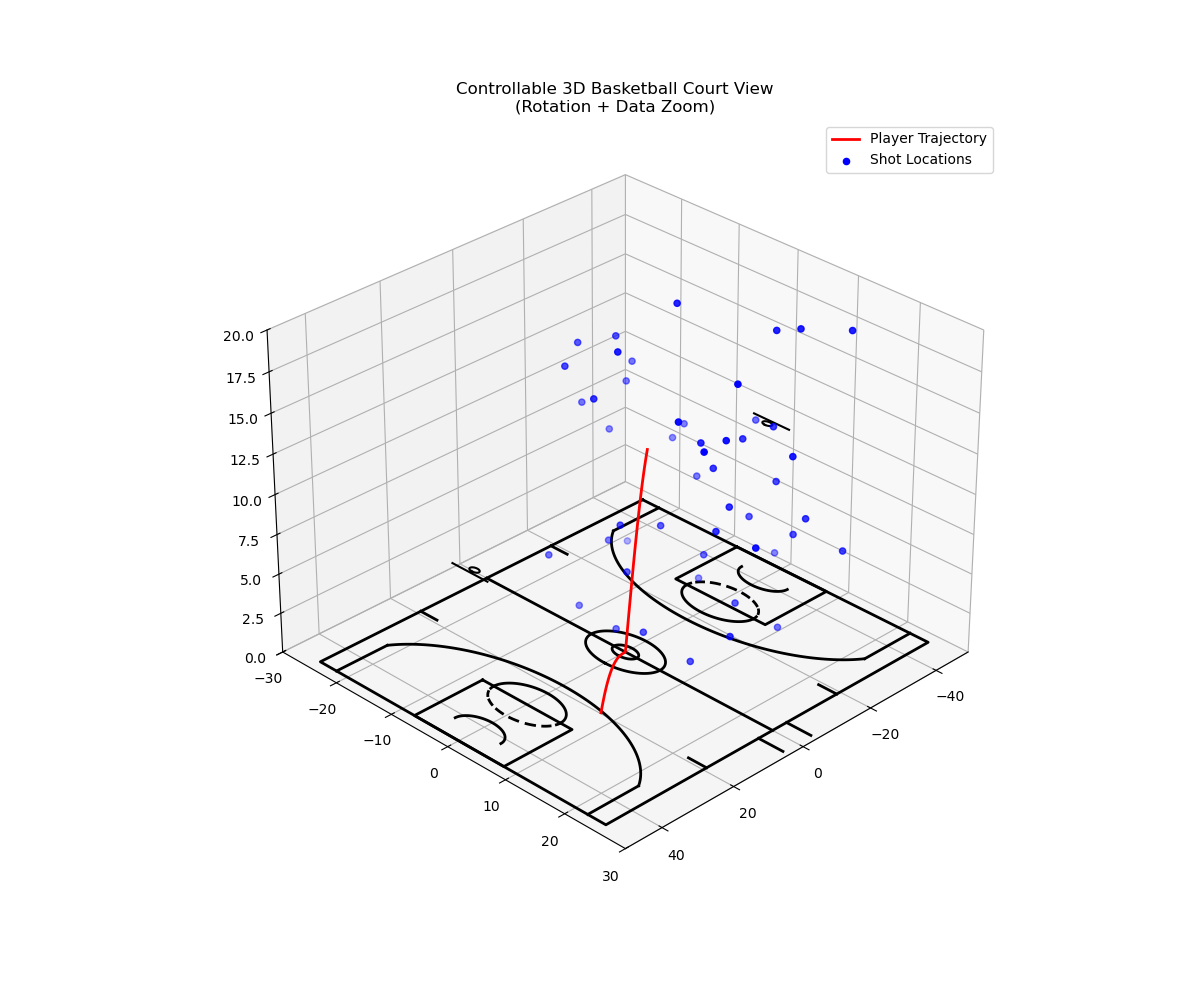

[data_zoom] factor=0.7, new x-lim=(-71.42857142857143, 71.42857142857143)
[data_zoom] factor=0.7, new x-lim=(-102.04081632653062, 102.04081632653062)
[data_zoom] factor=1.3, new x-lim=(-78.49293563579278, 78.49293563579278)
[data_zoom] factor=1.3, new x-lim=(-60.37918125830213, 60.37918125830213)
[data_zoom] factor=1.3, new x-lim=(-46.445524044847794, 46.445524044847794)


In [13]:
# Prime example of adjustable views in 3D basketball court

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from mplbasketball.court3d import draw_court_3d
from mplbasketball.utils import transform
import ipywidgets as widgets
from IPython.display import display
import matplotlib

###############################################################################
# 1) Create the 3D Court Figure Setup
###############################################################################
def create_3d_court_figure(
    elev=30,
    azim=45,
    xlim=(-50, 50),
    ylim=(-30, 30),
    zlim=(0, 20)
):
    """
    Helper function to create a figure and 3D axes,
    draw the basketball court, and set initial view/limits.
    
    Parameters
    ----------
    elev : float
        Initial elevation angle for the camera.
    azim : float
        Initial azimuth angle for the camera.
    xlim, ylim, zlim : tuple
        Axis limits in the 3D space.
    
    Returns
    -------
    fig : matplotlib.figure.Figure
        The created figure object.
    ax : matplotlib.axes._subplots.Axes3DSubplot
        The 3D axes on which the court is drawn.
    """
    # Create the figure and 3D subplot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Draw the 3D court
    draw_court_3d(ax, origin=np.array([0.0, 0.0]), line_width=2)
    
    # Enforce fixed axis limits
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_zlim(*zlim)
    
    # Set initial camera angles (these do not involve ax.dist)
    ax.view_init(elev=elev, azim=azim)
    
    print("Current backend:", matplotlib.get_backend())
    
    return fig, ax


###############################################################################
# 2) Rotation Only (No ax.dist zoom!)
###############################################################################
# We'll track the elevation/azimuth globally so button presses can modify them.
camera_elev = 30
camera_azim = 45

def rotate_view(ax, elev_change=0, azim_change=0):
    """
    Rotates/tilts the view by adjusting camera_elev and camera_azim.
    This does NOT modify ax.dist at all.
    """
    global camera_elev, camera_azim
    
    camera_elev += elev_change
    camera_azim += azim_change
    
    ax.view_init(elev=camera_elev, azim=camera_azim)
    ax.figure.canvas.draw_idle()
    
    
###############################################################################
# 3) Data-Limits Zoom (works in ipympl)
###############################################################################
def data_zoom(ax, zoom_factor=1.0):
    """
    A 'zoom' that rescales x, y, and z limits around the center of the scene.
    ipympl reliably honors this, so it's an effective solution in notebooks.
    """
    x0, x1 = ax.get_xlim3d()
    y0, y1 = ax.get_ylim3d()
    z0, z1 = ax.get_zlim3d()
    
    x_center = (x0 + x1) / 2
    y_center = (y0 + y1) / 2
    z_center = (z0 + z1) / 2
    
    x_half_range = (x1 - x0)/2
    y_half_range = (y1 - y0)/2
    z_half_range = (z1 - z0)/2
    
    # We divide the half-range by zoom_factor to get a "zoom in" effect
    new_x_half = x_half_range / zoom_factor
    new_y_half = y_half_range / zoom_factor
    new_z_half = z_half_range / zoom_factor
    
    ax.set_xlim3d([x_center - new_x_half, x_center + new_x_half])
    ax.set_ylim3d([y_center - new_y_half, y_center + new_y_half])
    ax.set_zlim3d([z_center - new_z_half, z_center + new_z_half])
    
    print(f"[data_zoom] factor={zoom_factor}, new x-lim={ax.get_xlim3d()}")
    ax.figure.canvas.draw_idle()


###############################################################################
# 4) Create Widgets for Rotation and Data Zoom
###############################################################################
def create_widgets(ax):
    """
    Creates and returns the interactive widgets for:
      - Rotating left/right
      - Tilting up/down
      - Data Zoom In/Out
    
    The returned widgets can be displayed together or separately.
    """
    # --- Rotation/Tilt Buttons ---
    btn_left  = widgets.Button(description='Rotate Left')
    btn_right = widgets.Button(description='Rotate Right')
    btn_up    = widgets.Button(description='Tilt Up')
    btn_down  = widgets.Button(description='Tilt Down')
    
    # Bind callbacks
    def on_rotate_left(b):
        rotate_view(ax, azim_change=-5)
    def on_rotate_right(b):
        rotate_view(ax, azim_change=5)
    def on_tilt_up(b):
        rotate_view(ax, elev_change=5)
    def on_tilt_down(b):
        rotate_view(ax, elev_change=-5)
    
    btn_left.on_click(on_rotate_left)
    btn_right.on_click(on_rotate_right)
    btn_up.on_click(on_tilt_up)
    btn_down.on_click(on_tilt_down)
    
    # --- Data Zoom Buttons ---
    btn_alt_zoom_in  = widgets.Button(description='Data Zoom In')
    btn_alt_zoom_out = widgets.Button(description='Data Zoom Out')
    
    def on_alt_zoom_in(b):
        data_zoom(ax, zoom_factor=1.3)  # zoom in
    def on_alt_zoom_out(b):
        data_zoom(ax, zoom_factor=0.7)  # zoom out
    
    btn_alt_zoom_in.on_click(on_alt_zoom_in)
    btn_alt_zoom_out.on_click(on_alt_zoom_out)
    
    # Pack them into horizontal boxes
    row1 = widgets.HBox([btn_left, btn_right, btn_up, btn_down])
    row2 = widgets.HBox([btn_alt_zoom_in, btn_alt_zoom_out])
    
    return row1, row2


###############################################################################
# 5) Putting it all together in a single cell
###############################################################################

# A. Create the 3D court and retrieve the figure and axes
fig, ax = create_3d_court_figure(elev=camera_elev, azim=camera_azim)

# B. Add some sample data (unchanged from your original code)
x = np.linspace(-40, 40, 100)
y = np.linspace(-20, 20, 100)
z = np.abs(np.sin(x * np.pi / 80) * 5)
ax.plot(x, y, z, 'r-', lw=2, label='Player Trajectory')

x_data = np.random.uniform(-40, 40, 50)
y_data = np.random.uniform(-20, 20, 50)
z_data = np.random.uniform(0, 20, 50)
x_hl, y_hl = transform(x_data, y_data, fr="h", to="hl", origin="center")
ax.scatter(x_hl, y_hl, z_data, color='blue', marker='o', label='Shot Locations')

ax.legend()
ax.set_title("Controllable 3D Basketball Court View\n(Rotation + Data Zoom)")

# C. Create the interactive widgets for rotation and data zoom
row1, row2 = create_widgets(ax)

# D. Display the widget controls
display(row1)
display(row2)

plt.show()


In [15]:
%%writefile animate/interactive_3d_court_streamlit.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from mplbasketball.court3d import draw_court_3d
from mplbasketball.utils import transform

# Initialize session state for camera controls
if 'camera' not in st.session_state:
    st.session_state.camera = {
        'elev': 30,
        'azim': 45,
        'dist': 40,       # We'll keep this for reference, but not use it for zoom
        'zoom_factor': 1.0
    }

# We also need a default for data_zoom if it doesn't exist yet
if 'data_zoom' not in st.session_state:
    st.session_state.data_zoom = 1.0

def create_3d_court():
    """Create and configure the 3D basketball court visualization"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Draw court
    draw_court_3d(ax, origin=np.array([0.0, 0.0]), line_width=1.5)
    
    # Set initial view
    ax.view_init(
        elev=st.session_state.camera['elev'],
        azim=st.session_state.camera['azim']
    )
    # We'll still set ax.dist, but it won't actually zoom in Streamlit.
    ax.dist = st.session_state.camera['dist']
    
    # Set axis limits
    ax.set_xlim(-50, 50)
    ax.set_ylim(-30, 30)
    ax.set_zlim(0, 20)
    
    return fig, ax

def add_sample_data(ax):
    """Add sample trajectory and shot data"""
    # Player trajectory
    x = np.linspace(-40, 40, 100)
    y = np.linspace(-20, 20, 100)
    z = np.abs(np.sin(x * np.pi / 80) * 5)
    ax.plot(x, y, z, 'r-', lw=2, label='Player Trajectory')
    
    # Shot locations
    x_data = np.random.uniform(-40, 40, 50)
    y_data = np.random.uniform(-20, 20, 50)
    z_data = np.random.uniform(0, 20, 50)
    x_hl, y_hl = transform(x_data, y_data, fr="h", to="hl", origin="center")
    ax.scatter(x_hl, y_hl, z_data, color='blue', marker='o', label='Shot Locations')

###############################################################################
# Streamlit UI
###############################################################################
st.title("3D Basketball Court Visualization")

# Create columns for the rotation/tilt/zoom buttons
col1, col2, col3 = st.columns(3)

with col1:
    # Rotation controls
    if st.button('Rotate Left'):
        st.session_state.camera['azim'] -= 5
    if st.button('Rotate Right'):
        st.session_state.camera['azim'] += 5

with col2:
    # Elevation controls
    if st.button('Tilt Up'):
        st.session_state.camera['elev'] += 5
    if st.button('Tilt Down'):
        st.session_state.camera['elev'] -= 5

with col3:
    # CHANGED HERE: "Zoom In" & "Zoom Out" now update 'data_zoom'
    if st.button('Zoom In'):
        # Increase data_zoom but clamp to 2.0 max
        st.session_state.data_zoom = min(2.0, st.session_state.data_zoom * 1.1)
    if st.button('Zoom Out'):
        # Decrease data_zoom but clamp to 0.5 min
        st.session_state.data_zoom = max(0.5, st.session_state.data_zoom * 0.9)

# Data limits zoom slider
st.slider(
    'Data Zoom Level', 
    0.5, 
    2.0, 
    1.0, 
    key='data_zoom',
    help="Adjust the visible court area (0.5 = wide angle, 2.0 = close-up)"
)

# Create and update visualization
fig, ax = create_3d_court()
add_sample_data(ax)

# CHANGED HERE: Apply data-limits zoom with st.session_state.data_zoom
current_zoom = st.session_state.data_zoom
ax.set_xlim(-50/current_zoom, 50/current_zoom)
ax.set_ylim(-30/current_zoom, 30/current_zoom)
ax.set_zlim(0, 20/current_zoom)

# Finalize plot
ax.legend()
ax.set_title("Interactive 3D Basketball Court")

st.pyplot(fig)


Overwriting animate/interactive_3d_court_streamlit.py


In [2]:
%%writefile animate/__init__.py
# Create __init__.py in notebooks/animate/
# Empty file to mark 'animate' as a package


Overwriting animate/__init__.py


In [1]:
%%writefile animate/viewpoints.py
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)

# Define common viewpoints
COMMON_VIEWPOINTS = {
    "side_view_right": {"elev": 0, "azim": 90},
    "side_view_left": {"elev": 0, "azim": -90},
    "top_down": {"elev": 90, "azim": 0},
    "diagonal_view": {"elev": 45, "azim": 45},
    "player_centric": {"elev": 30, "azim": 0},
    "diagonal_player_centric": {"elev": 30, "azim": 45},
    "inverse_player_centric": {"elev": 30, "azim": 180}
}

def get_viewpoint(name: str) -> dict:
    """
    Retrieve viewpoint parameters by name.
    
    Parameters:
      - name (str): The name of the viewpoint.
      
    Returns:
      - dict: Dictionary containing 'elev' and 'azim'.
    """
    try:
        viewpoint = COMMON_VIEWPOINTS[name]
        logger.debug(f"Retrieved viewpoint '{name}': {viewpoint}")
        return viewpoint
    except KeyError:
        logger.error(f"Viewpoint '{name}' not found. Available viewpoints: {list(COMMON_VIEWPOINTS.keys())}")
        raise ValueError(f"Viewpoint '{name}' not found. Choose from {list(COMMON_VIEWPOINTS.keys())}")

def update_3d_view(ax: plt.Axes, elev: float, azim: float, data_zoom: float, zlim: float) -> None:
    """
    Update the view of a 3D axis independently.
    
    This function sets the camera view (elevation and azimuth) and adjusts the axis
    limits using the provided data_zoom factor and z-axis limit.
    
    Parameters:
      - ax (plt.Axes): The 3D axis to update.
      - elev (float): The elevation angle.
      - azim (float): The azimuth angle.
      - data_zoom (float): The zoom factor to adjust x, y, and z limits.
      - zlim (float): The maximum value for the z-axis.
    
    Returns:
      - None
    """
    # Set the camera view
    ax.view_init(elev=elev, azim=azim)
    
    # Retrieve current x and y limits and adjust them based on the zoom factor.
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim([x_min / data_zoom, x_max / data_zoom])
    ax.set_ylim([y_min / data_zoom, y_max / data_zoom])
    # Set the z-axis limit from 0 to zlim adjusted by the zoom factor.
    ax.set_zlim([0, zlim / data_zoom])
    
    logger.debug(f"3D view updated: elev={elev}, azim={azim}, data_zoom={data_zoom}, zlim={zlim}")


Writing animate/viewpoints.py


FileNotFoundError: [Errno 2] No such file or directory: 'animate/viewpoints.py'

In [4]:
%%writefile animate/court.py
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplbasketball.court3d import Court3D, draw_court_3d

logger = logging.getLogger(__name__)

def get_hoop_position(court_type: str = "nba", units: str = "ft", debug: bool = False) -> (float, float, float):
    """
    Calculate the 3D position of the basketball hoop based on court specifications.

    Parameters:
    - court_type (str): Type of the court ('nba', 'wnba', 'ncaa').
    - units (str): Units of measurement ('ft' or 'm').
    - debug (bool): Flag to enable debug logging.

    Returns:
    - x, y, z (float): Coordinates of the hoop in 3D space.
    """
    try:
        court = Court3D(court_type=court_type, units=units)
        params = court.court_parameters
        # The hoop is located a certain distance from the edge of the court
        x = params['court_dims'][0] / 2 - params['hoop_distance_from_edge']
        y = 0.0  # Centered along the y-axis
        z = params['hoop_height']
        if debug:
            logger.debug(f"Calculated hoop position at (x={x}, y={y}, z={z}) for court type '{court_type}' in '{units}' units.")
        return x, y, z
    except KeyError as e:
        logger.error(f"Key error when accessing court parameters: {e}")
        raise
    except Exception as e:
        logger.error(f"Unexpected error in get_hoop_position: {e}")
        raise


def draw_court(ax: plt.Axes, court_type: str = "nba", units: str = "ft", debug: bool = False) -> None:
    """
    Draw the basketball court and hoops on the given axes.

    Parameters:
    - ax (plt.Axes): The Matplotlib 3D axis object.
    - court_type (str): Type of the court ('nba', 'wnba', 'ncaa').
    - units (str): Units of measurement ('ft' or 'm').
    - debug (bool): Flag to enable debug logging.

    Returns:
    - None
    """
    try:
        # Draw the court using mplbasketball
        draw_court_3d(ax, court_type=court_type, units=units, origin=np.array([0.0, 0.0]), line_width=2)
        if debug:
            logger.debug("Court drawn successfully using mplbasketball.")

        # Get court parameters
        court = Court3D(court_type=court_type, units=units)
        court_params = court.court_parameters
        if debug:
            logger.debug(f"Court Parameters in draw_court: {court_params}")

        # Get hoop position
        hoop_x, hoop_y, hoop_z = get_hoop_position(court_type=court_type, units=units, debug=debug)


        # Draw the hoop as a circle
        hoop_radius = court_params['hoop_diameter'] / 2
        theta_circle = np.linspace(0, 2 * np.pi, 100)
        hoop_xs = hoop_x + hoop_radius * np.cos(theta_circle)
        hoop_ys = hoop_y + hoop_radius * np.sin(theta_circle)
        hoop_zs = np.full_like(hoop_xs, hoop_z)

        ax.plot(hoop_xs, hoop_ys, hoop_zs, c='orange', lw=3)
        if debug:
            logger.debug(f"Hoop drawn at position ({hoop_x}, {hoop_y}, {hoop_z}) with radius {hoop_radius}.")

        # Plot half-court line
        half_court_x = np.linspace(-court_params['court_dims'][0]/2, court_params['court_dims'][0]/2, 100)
        half_court_y = np.full_like(half_court_x, 0.0)
        half_court_z = np.full_like(half_court_x, 0.0)
        ax.plot(half_court_x, half_court_y, half_court_z, c='black', lw=2, linestyle='--', label='Half-Court Line')
        if debug:
            logger.debug("Half-court line plotted.")

        # Plot sidelines
        sideline_x = np.linspace(-court_params['court_dims'][0]/2, court_params['court_dims'][0]/2, 100)
        sideline_y_positive = np.full_like(sideline_x, court_params['court_dims'][1]/2)
        sideline_z = np.full_like(sideline_x, 0.0)
        ax.plot(sideline_x, sideline_y_positive, sideline_z, c='blue', lw=2, label='Sideline')
        if debug:
            logger.debug("Positive sideline plotted.")

        sideline_y_negative = np.full_like(sideline_x, -court_params['court_dims'][1]/2)
        ax.plot(sideline_x, sideline_y_negative, sideline_z, c='blue', lw=2, label='Sideline')
        if debug:
            logger.debug("Negative sideline plotted.")

        # Plot baselines
        baseline_y = np.linspace(-court_params['court_dims'][1]/2, court_params['court_dims'][1]/2, 100)
        baseline_z = np.full_like(baseline_y, 0.0)
        ax.plot(court_params['court_dims'][0]/2, baseline_y, baseline_z, c='green', lw=2, label='Baseline')
        if debug:
            logger.debug("Positive baseline plotted.")

        ax.plot(-court_params['court_dims'][0]/2, baseline_y, baseline_z, c='green', lw=2, label='Baseline')
        if debug:
            logger.debug("Negative baseline plotted.")

        if debug:
            logger.debug("Additional court features (half-court, sidelines, baselines) drawn successfully.")
    except KeyError as e:
        logger.error(f"Key error in draw_court: {e}")
        raise
    except Exception as e:
        logger.error(f"Error drawing court or hoop: {e}")
        raise


Overwriting animate/court.py


In [5]:
%%writefile animate/elements.py
import logging
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

logger = logging.getLogger(__name__)

def initialize_elements(
    ax: plt.Axes,
    connections: list,
    player_color: str,
    player_lw: float,
    ball_color: str,
    ball_size: float,
    debug: bool = False
) -> (dict, plt.Line2D, plt.Text, plt.Text, plt.Text, dict):
    """
    Initialize plot elements for the player skeleton, ball, text annotations,
    and now also creates a marker (small dot) for every unique joint.
    
    Returns:
        lines (dict): Dictionary of line objects for each connection.
        ball (plt.Line2D): The ball plot object.
        release_text (plt.Text): Text object for release point indicator.
        motion_text (plt.Text): Text object for motion phase indicator.
        distance_text (plt.Text): Text object for distance to hoop.
        joint_markers (dict): Dictionary of marker objects for each unique joint.
    """
    try:
        # 1) SKELETON LINES
        lines = {connection: ax.plot([], [], [], c=player_color, lw=player_lw)[0] for connection in connections}
        
        # 2) BALL MARKER
        ball, = ax.plot([], [], [], "o", markersize=ball_size, c=ball_color)
        
        # 3) TEXT ELEMENTS
        release_text = ax.text2D(0.05, 0.95, "", transform=ax.transAxes,
                                 color="red", fontsize=14, weight="bold")
        motion_text = ax.text2D(0.05, 0.90, "", transform=ax.transAxes,
                                color="blue", fontsize=12, weight="bold")
        distance_text = ax.text2D(0.05, 0.85, "", transform=ax.transAxes,
                                  color="green", fontsize=12, weight="bold")
        
        # 4) NEW: JOINT MARKERS
        # Create a set of all unique joint names from the connections list.
        unique_joints = set()
        for (joint_a, joint_b) in connections:
            unique_joints.add(joint_a)
            unique_joints.add(joint_b)
        joint_markers = {}
        for joint in unique_joints:
            marker_line, = ax.plot([], [], [], "o", color=player_color, markersize=5)
            joint_markers[joint] = marker_line

        if debug:
            logger.debug("Elements initialized (lines, ball, texts, and joint markers).")
        
        return lines, ball, release_text, motion_text, distance_text, joint_markers
    
    except Exception as e:
        logger.error(f"Error initializing elements: {e}")
        raise


def initialize_plot(zlim=20, elev=30, azim=60, figsize=(12, 10), debug=False):
    """
    Initialize a 3D plot with specified view settings and outputs setup details.

    Parameters:
    - zlim (float): The limit for the z-axis (height).
    - elev (float): Elevation angle in the z plane for the camera view.
    - azim (float): Azimuth angle in the x,y plane for the camera view.
    - figsize (tuple): Figure size.
    - debug (bool): Flag to enable debug logging.

    Returns:
    - fig: The Matplotlib figure object.
    - ax: The Matplotlib 3D axis object.
    """
    try:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection="3d")
        ax.set_zlim([0, zlim])
        ax.set_box_aspect([1, 1, 1])
        ax.view_init(elev=elev, azim=azim)
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        if debug:
            logger.debug(f"Initialized 3D plot with Z limit: {zlim}, Elevation: {elev}, Azimuth: {azim}")
        return fig, ax
    except Exception as e:
        logger.error(f"Failed to initialize plot: {e}")
        raise



Overwriting animate/elements.py


In [6]:
%%writefile animate/animate_from_df.py

import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
from IPython.display import HTML
from mplbasketball.court3d import Court3D, draw_court_3d

from animate.elements import initialize_elements, initialize_plot
from animate.court import draw_court, get_hoop_position
from animate.viewpoints import get_viewpoint


logger = logging.getLogger(__name__)

def update_frame(
    ax: plt.Axes,
    frame: int,
    df: pd.DataFrame,
    release_frame: int,
    lines: dict,
    ball: plt.Line2D,
    release_text: plt.Text,
    motion_text: plt.Text,
    connections: list,
    ball_color: str,
    highlight_color: str,
    debug: bool = False
) -> None:
    """
    Update function for each frame in the animation.

    Parameters:
    - ax (plt.Axes): The Matplotlib 3D axis object.
    - frame (int): The current frame number.
    - df (pd.DataFrame): DataFrame containing motion data.
    - release_frame (int): Frame index of the release point.
    - lines (dict): Dictionary of line objects for skeleton.
    - ball (plt.Line2D): Ball object for animation.
    - release_text (plt.Text): Text object for release point.
    - motion_text (plt.Text): Text object for motion phase.
    - connections (list): Joint connections.
    - ball_color (str): Default ball color.
    - highlight_color (str): Highlight color for release point.
    - debug (bool): Flag to enable debug logging.

    Returns:
    - None
    """
    try:
        if debug and frame % 10 == 0:
            logger.debug(f"Updating frame {frame}")

        # Highlight the release frame
        if frame == release_frame:
            ball.set_color(highlight_color)
            release_text.set_text("Release Point!")
            if debug:
                logger.debug(f"Frame {frame} is the release frame. Ball color changed to {highlight_color}.")
        else:
            ball.set_color(ball_color)
            release_text.set_text("")

        # Update motion phase text if 'shooting_motion' exists
        if 'shooting_motion' in df.columns:
            shooting_motion = df.at[frame, 'shooting_motion']
            motion_text.set_text("Shooting Motion" if shooting_motion == 1 else "")
        else:
            motion_text.set_text("")

        # Update lines for joints
        for connection in connections:
            part1, part2 = connection
            if (f"{part1}_x" in df.columns and f"{part2}_x" in df.columns and
                not pd.isna(df.at[frame, f"{part1}_x"]) and not pd.isna(df.at[frame, f"{part2}_x"])):
                x = [df.at[frame, f"{part1}_x"], df.at[frame, f"{part2}_x"]]
                y = [df.at[frame, f"{part1}_y"], df.at[frame, f"{part2}_y"]]
                z = [df.at[frame, f"{part1}_z"], df.at[frame, f"{part2}_z"]]
                lines[connection].set_data_3d(x, y, z)
            else:
                # If data is missing, hide the line
                lines[connection].set_data([], [])
                lines[connection].set_3d_properties([])

        # Update ball position if ball coordinates exist
        if 'ball_x' in df.columns and 'ball_y' in df.columns and 'ball_z' in df.columns:
            ball_x = df.at[frame, 'ball_x']
            ball_y = df.at[frame, 'ball_y']
            ball_z = df.at[frame, 'ball_z']
            if not (pd.isna(ball_x) or pd.isna(ball_y) or pd.isna(ball_z)):
                ball.set_data_3d([ball_x], [ball_y], [ball_z])
            else:
                # Hide the ball if data is missing
                ball.set_data([], [])
                ball.set_3d_properties([])
        else:
            # Hide the ball if columns are missing
            ball.set_data([], [])
            ball.set_3d_properties([])
    except Exception as e:
        logger.error(f"Error updating frame {frame}: {e}")
        raise



def animate_trial_from_df(
    df: pd.DataFrame,
    release_frame: int,
    viewpoint_name: str = "side_view_right",
    connections: list = None,
    zlim: float = 15.0,
    player_color: str = "purple",
    player_lw: float = 2.0,
    ball_color: str = "#ee6730",
    ball_size: float = 20.0,
    highlight_color: str = "red",
    show_court: bool = True,
    court_type: str = "nba",
    units: str = "ft",
    notebook_mode: bool = True,
    debug: bool = False
) -> HTML:
    """
    Animate a basketball trial from a DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame containing motion data.
    - release_frame (int): Frame index of the release point.
    - viewpoint_name (str): Name of the predefined viewpoint.
    - connections (list): List of joint connections.
    - zlim (float): The limit for the z-axis (height).
    - player_color (str): Color for player skeleton.
    - player_lw (float): Line width for player skeleton.
    - ball_color (str): Color for the ball.
    - ball_size (float): Size of the ball marker.
    - highlight_color (str): Highlight color for release point.
    - show_court (bool): Whether to display the court.
    - court_type (str): Type of the court ('nba', 'wnba', 'ncaa').
    - units (str): Units of measurement ('ft' or 'm').
    - notebook_mode (bool): Whether to display animation in Jupyter notebook.
    - debug (bool): Flag to enable debug logging.

    Returns:
    - HTML: HTML representation of the animation for notebook display.
    """
    try:
        if connections is None:
            logger.error("No connections provided for player skeleton.")
            raise ValueError("Connections list cannot be None.")

        # Close any existing figures to prevent duplicate animations
        plt.close('all')

        if debug:
            logger.debug("Starting animation setup.")
            logger.debug(f"Total frames in DataFrame: {len(df)}")
            logger.debug(f"Release frame index provided: {release_frame}")
            logger.debug(f"Selected viewpoint: {viewpoint_name}")

        # Retrieve elev and azim based on viewpoint_name
        viewpoint = get_viewpoint(viewpoint_name)
        elev = viewpoint['elev']
        azim = viewpoint['azim']

        # Plot setup with predefined viewpoint
        fig, ax = initialize_plot(zlim=zlim, elev=elev, azim=azim, figsize=(12, 10), debug=debug)

        # Draw court and get hoop position
        if show_court:
            draw_court(ax, court_type=court_type, units=units, debug=debug)
            hoop_x, hoop_y, hoop_z = get_hoop_position(court_type=court_type, units=units, debug=debug)
            if debug:
                logger.debug(f"Hoop position retrieved: ({hoop_x}, {hoop_y}, {hoop_z})")
        else:
            hoop_x, hoop_y, hoop_z = None, None, None
            if debug:
                logger.debug("Court not shown. Hoop position set to None.")

        # Initialize elements for animation
        lines, ball, release_text, motion_text, distance_text = initialize_elements(
            ax, connections, player_color, player_lw, ball_color, ball_size, debug=debug
        )

        # Compute axes limits based on player data and hoop position
        if debug:
            logger.debug("Calculating axes limits to include player and hoop.")

        # Extract all x and y coordinates for the player
        player_x_cols = [col for col in df.columns if col.endswith('_x')]
        player_y_cols = [col for col in df.columns if col.endswith('_y')]

        player_x = df[player_x_cols].values.flatten()
        player_y = df[player_y_cols].values.flatten()

        # Remove NaN values
        player_x = player_x[~np.isnan(player_x)]
        player_y = player_y[~np.isnan(player_y)]

        if len(player_x) == 0 or len(player_y) == 0:
            logger.warning("No player coordinates found. Axes limits may not be set correctly.")

        # Get court parameters
        if show_court:
            court = Court3D(court_type=court_type, units=units)
            court_params = court.court_parameters
        else:
            court_params = {'court_length': 94.0, 'court_width': 50.0}  # Default values

        # Initialize min and max with player coordinates
        x_min = player_x.min() - 10.0 if len(player_x) > 0 else -court_params['court_length']/2
        x_max = player_x.max() + 10.0 if len(player_x) > 0 else court_params['court_length']/2
        y_min = player_y.min() - 10.0 if len(player_y) > 0 else -court_params['court_width']/2
        y_max = player_y.max() + 10.0 if len(player_y) > 0 else court_params['court_width']/2

        # Include hoop position in the limits if court is shown and hoop position is valid
        if show_court and hoop_x is not None and hoop_y is not None:
            x_min = min(x_min, hoop_x - 10.0)
            x_max = max(x_max, hoop_x + 10.0)
            y_min = min(y_min, hoop_y - 10.0)
            y_max = max(y_max, hoop_y + 10.0)
            if debug:
                logger.debug(f"Including hoop position in axes limits.")

        if debug:
            logger.debug(f"Player X range: {player_x.min()} to {player_x.max()}")
            logger.debug(f"Player Y range: {player_y.min()} to {player_y.max()}")
            if show_court:
                logger.debug(f"Hoop position: ({hoop_x}, {hoop_y})")
            logger.debug(f"Using xbuffer: 10.0, ybuffer: 10.0")

        # Set fixed axes limits
        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])

        if debug:
            logger.debug(f"Set axes limits: x=({x_min}, {x_max}), y=({y_min}, {y_max})")

        # Set plot title to include the viewpoint name
        ax.set_title(f"Animation - {viewpoint_name}", fontsize=16)
        if debug: 
            logger.debug(f"Set plot title to 'Animation - {viewpoint_name}'")

        # Create custom legend handles for static court features
        hoop_handle = Line2D([0], [0], color='orange', lw=3, label='Hoop')
        baseline_handle = Line2D([0], [0], color='blue', lw=2, label='Baseline')
        sideline_handle = Line2D([0], [0], color='green', lw=2, label='Sideline')

        # Create handles for dynamic elements
        player_handle = Line2D([0], [0], color=player_color, lw=player_lw, label='Player')
        ball_handle = Line2D([0], [0], marker='o', color='w', label='Ball',
                             markerfacecolor=ball_color, markersize=10)

        # Add legend with both static and dynamic elements (excluding distance)
        ax.legend(handles=[
            hoop_handle,  # Hoop in orange
            sideline_handle,  # Sideline in green
            baseline_handle,  # Baseline in blue
            player_handle,  # Player skeleton in purple
            ball_handle  # Ball in orange
        ], loc='upper right')

        if debug:
            logger.debug("Legend added with static court features and dynamic elements.")

        # Update function for animation
        def update_func(frame: int):
            """
            Wrapper function for updating the frame in the animation.
            """
            update_frame(
                ax=ax,
                frame=frame,
                df=df,
                release_frame=release_frame,
                lines=lines,
                ball=ball,
                release_text=release_text,
                motion_text=motion_text,
                connections=connections,
                ball_color=ball_color,
                highlight_color=highlight_color,
                debug=debug
            )

            # Update the distance text if available
            if 'distance_to_hoop' in df.columns:
                distance = df.at[frame, 'distance_to_hoop']
                if not pd.isna(distance):
                    distance_text.set_text(f"Distance to Hoop: {distance:.2f} ft")
                else:
                    distance_text.set_text("")
            else:
                distance_text.set_text("")

        # Animation setup
        anim = FuncAnimation(fig, update_func, frames=len(df), interval=1000 / 30, blit=False)

        if notebook_mode:
            if debug:
                logger.debug("Returning animation for notebook display.")
            return HTML(anim.to_jshtml())
        else:
            if debug:
                logger.debug("Returning animation object.")
            return anim
    except Exception as e:
        logger.error(f"An error occurred during animation: {e}")
        raise






Overwriting animate/animate_from_df.py


In [7]:
%%writefile animate/animate_from_df_main.py

import logging
import pandas as pd
from IPython.display import display

from animate.animate_from_df import animate_trial_from_df

joint_configs = [
    {
        'name': 'knee',
        'min_angle_key': 'knee_max_angle_filtered_optimal_min',
        'max_angle_key': 'knee_max_angle_filtered_optimal_max',
        'release_min_angle_key': 'knee_release_angle_filtered_optimal_min',
        'release_max_angle_key': 'knee_release_angle_filtered_optimal_max',
        'angle_key': 'knee_angle',
        'is_max_key': 'is_knee_max_angle',
        'classification_key': 'knee_max_angle_shot_classification',
        'release_classification_key': 'knee_release_angle_shot_classification'
    },
    {
        'name': 'elbow',
        'min_angle_key': 'elbow_max_angle_filtered_optimal_min',
        'max_angle_key': 'elbow_max_angle_filtered_optimal_max',
        'release_min_angle_key': 'elbow_release_angle_filtered_optimal_min',
        'release_max_angle_key': 'elbow_release_angle_filtered_optimal_max',
        'angle_key': 'elbow_angle',
        'is_max_key': 'is_elbow_max_angle',
        'classification_key': 'elbow_max_angle_shot_classification',
        'release_classification_key': 'elbow_release_angle_shot_classification'
    },
    {
        'name': 'wrist',
        'min_angle_key': 'max_wrist_angle_filtered_optimal_min',
        'max_angle_key': 'max_wrist_angle_filtered_optimal_max',
        'release_min_angle_key': 'wrist_release_angle_filtered_optimal_min',
        'release_max_angle_key': 'wrist_release_angle_filtered_optimal_max',
        'angle_key': 'wrist_angle',
        'is_max_key': 'is_max_wrist_angle',
        'classification_key': 'max_wrist_angle_shot_classification',
        'release_classification_key': 'wrist_release_angle_shot_classification'
    }
]


# Configure logging for debugging
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def main():
    try:
        # Load data from the specified CSV file
        data_path = "../../data/processed/final_granular_dataset.csv"
        final_granular_df_with_stats = pd.read_csv(data_path)
        logger.debug(f"Loaded data from {data_path} with shape {final_granular_df_with_stats.shape}")

        # Define connections between joints
        connections = [
            ("R_EYE", "L_EYE"), ("R_EYE", "NOSE"), ("L_EYE", "NOSE"),
            ("R_EYE", "R_EAR"), ("L_EYE", "L_EAR"), ("R_SHOULDER", "L_SHOULDER"),
            ("R_SHOULDER", "R_ELBOW"), ("L_SHOULDER", "L_ELBOW"), ("R_ELBOW", "R_WRIST"),
            ("L_ELBOW", "L_WRIST"), ("R_SHOULDER", "R_HIP"), ("L_SHOULDER", "L_HIP"),
            ("R_HIP", "L_HIP"), ("R_HIP", "R_KNEE"), ("L_HIP", "L_KNEE"),
            ("R_KNEE", "R_ANKLE"), ("L_KNEE", "L_ANKLE"), ("R_WRIST", "R_1STFINGER"),
            ("R_WRIST", "R_5THFINGER"), ("L_WRIST", "L_1STFINGER"), ("L_WRIST", "L_5THFINGER"),
            ("R_ANKLE", "R_1STTOE"), ("R_ANKLE", "R_5THTOE"), ("L_ANKLE", "L_1STTOE"),
            ("L_ANKLE", "L_5THTOE"), ("R_ANKLE", "R_CALC"), ("L_ANKLE", "L_CALC"),
            ("R_1STTOE", "R_5THTOE"), ("L_1STTOE", "L_5THTOE"), ("R_1STTOE", "R_CALC"),
            ("L_1STTOE", "L_CALC"), ("R_5THTOE", "R_CALC"), ("L_5THTOE", "L_CALC"),
            ("R_1STFINGER", "R_5THFINGER"), ("L_1STFINGER", "L_5THFINGER")
        ]
        logger.debug("Defined joint connections for player skeleton.")

        # Select a specific trial for visualization
        trial_id_to_visualize = 'T0088'  # Replace with actual trial ID you want to visualize
        trial_data = final_granular_df_with_stats[final_granular_df_with_stats['trial_id'] == trial_id_to_visualize]
        trial_data = trial_data.sort_values(by='frame_time').reset_index(drop=True)
        logger.debug(f"Selected trial ID '{trial_id_to_visualize}' with {len(trial_data)} frames.")

        # Determine the release frame (the frame where release_point_filter is 1)
        release_frames = trial_data.index[trial_data["release_point_filter"] == 1].tolist()
        release_frame = release_frames[0] if release_frames else None
        if release_frame is not None:
            logger.debug(f"Release frame found at index {release_frame}.")
        else:
            logger.warning("No release frame found in the trial data.")

        # Set parameters for visualization
        viewpoint_name = "diagonal_player_centric"  # Choose from COMMON_VIEWPOINTS
        zlim = 15        # Adjust for height


        # Call the first animation function
        animation_html = animate_trial_from_df(
            df=trial_data,
            release_frame=release_frame,
            viewpoint_name=viewpoint_name,
            connections=connections,
            zlim=zlim,
            player_color="purple",
            player_lw=2.0,
            ball_color="#ee6730",
            ball_size=20.0,
            highlight_color="red",
            show_court=True,
            court_type="nba",
            units="ft",
            notebook_mode=True,
            debug=True  # Enable detailed logging for troubleshooting
        )
        
        # Display the first animation
        display(animation_html)

    except Exception as e:
        logger.error(f"An error occurred in main: {e}")
        raise

if __name__ == "__main__":
    main()


Overwriting animate/animate_from_df_main.py


### Add on Shot meters

- Basic logistic
  - No predictions needed
  - Take out the outliers and base it within the successful shots angles


- Bayes optimized angles with Shap post recommendations, graphs, and trends

### add on shaps/bayes optimization angles

In [10]:
%%writefile animate/calc_bayes_shap_feature_engineering.py
import os
import json
import pickle
import logging
import requests
from io import BytesIO
from pathlib import Path
from datetime import datetime
from typing import List, Tuple, Dict, Optional

import numpy as np
import pandas as pd

# add for if we ever want to recalculate the shap min and max values
from ml.config.config_loader import load_config
from ml.config.config_models import AppConfig
from ml.shap.shap_utils import load_dataset, setup_logging, load_configuration, initialize_logger
from ml.shap.predict_with_shap_usage import predict_and_shap
    
# ------------------------------------------------------------------------------
# Logging configuration (used by bayesian metrics functions)
# ------------------------------------------------------------------------------
logger = logging.getLogger('combined_feature_engineering')
if not logger.hasHandlers():
    logger.setLevel(logging.DEBUG)
    handler = logging.StreamHandler()
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)


def round_numeric_columns(df: pd.DataFrame, decimals: int = 2) -> pd.DataFrame:
    """
    Rounds all float columns in the DataFrame to the specified number of decimals.
    """
    float_cols = df.select_dtypes(include=['float']).columns
    df[float_cols] = df[float_cols].round(decimals)
    return df

# ------------------------------------------------------------------------------
# SHOT METER FEATURE ENGINEERING FUNCTIONS
# ------------------------------------------------------------------------------

def calculate_release_angles(df: pd.DataFrame, handedness: str = "R", debug: bool = False) -> pd.DataFrame:
    """
    Calculate and merge release angles (mean knee, wrist, and elbow angles) based on release_point_filter.
    For right-handed shots, uses right-side columns; for left-handed, uses left-side columns.
    The computed release angles are aggregated by trial_id and merged back into the original dataframe.
    
    Parameters:
      - df: Input DataFrame containing angle measurements and a 'release_point_filter' column.
      - handedness: 'R' or 'L', indicating whether to use right-side or left-side measurements.
      - debug: If True, prints debug information.
    
    Returns:
      - df: DataFrame with new release angle columns merged in.
    """
    # Check if the handedness is valid.
    if handedness not in ['R', 'L']:
        raise ValueError("Handedness must be 'R' for right-handed or 'L' for left-handed.")
    
    if debug:
        print(f"Calculating release angles for {handedness}-handed shots.")
    
    # Select the appropriate columns based on handedness.
    if handedness == 'R':
        df['knee_angle'] = df['R_KNEE_angle']
        df['wrist_angle'] = df['R_WRIST_angle']
        df['elbow_angle'] = df['R_ELBOW_angle']
    else:
        df['knee_angle'] = df['L_KNEE_angle']
        df['wrist_angle'] = df['L_WRIST_angle']
        df['elbow_angle'] = df['L_ELBOW_angle']
    
    # Filter rows where release_point_filter == 1.
    release_df = df[df['release_point_filter'] == 1]
    if debug:
        print(f"[calculate_release_angles] release_df shape: {release_df.shape}")
    
    # Set new column names based on handedness.
    if handedness == 'R':
        new_names = {
            'knee_angle': 'R_KNEE_release_angle',
            'wrist_angle': 'R_WRIST_release_angle',
            'elbow_angle': 'R_ELBOW_release_angle'
        }
    else:
        new_names = {
            'knee_angle': 'L_KNEE_release_angle',
            'wrist_angle': 'L_WRIST_release_angle',
            'elbow_angle': 'L_ELBOW_release_angle'
        }
    
    # Group by trial_id and calculate the mean angles, then rename the aggregated columns.
    release_angles = (
        release_df.groupby('trial_id')
        .agg({
            'knee_angle': 'mean',
            'wrist_angle': 'mean',
            'elbow_angle': 'mean'
        })
        .rename(columns=new_names)
    )
    
    if debug:
        print(f"[calculate_release_angles] release_angles shape: {release_angles.shape}")
        print(f"[calculate_release_angles] New columns: {list(release_angles.columns)}")
    
    # Merge the release angles back into the original DataFrame.
    df = df.merge(release_angles, on='trial_id', how='left')
    
    if debug:
        print(f"[calculate_release_angles] Final df shape after merge: {df.shape}")
    else:
        print("[calculate_release_angles] Step completed.")
    
    return df



def calculate_optimal_release_angle_ranges(
    df: pd.DataFrame,
    debug: bool = False,
    calc_feedback_range_percentile: float = 10  # single parameter for feedback range
) -> pd.DataFrame:
    """
    Calculate initial and filtered optimal angle ranges for knee, wrist, and elbow at the release point.
    
    For each joint, the function computes the full range from the release data and calculates a symmetric margin:
        margin = (orig_max - orig_min) * (calc_feedback_range_percentile / 100) / 2
    
    The filtered optimal range is then defined as:
        filtered_optimal_min = optimal_value - margin
        filtered_optimal_max = optimal_value + margin
    
    These boundaries are later used to classify each shot as 'Early', 'Late', or 'Good'.
    """
    step = "Optimal Release Angle Ranges"
    # Filter for rows where release_point_filter==1 and result==1.
    release_df = df[(df['release_point_filter'] == 1) & (df['result'] == 1)]
    if debug:
        print(f"[{step}] Filtered release_df shape: {release_df.shape}")
    else:
        print(f"[{step}] Filtering completed.")
    
    # Prepare new columns (initialize as NaN).
    new_cols = [
        'knee_release_angle_initial_optimal_min', 'knee_release_angle_initial_optimal_max',
        'wrist_release_angle_initial_optimal_min', 'wrist_release_angle_initial_optimal_max',
        'elbow_release_angle_initial_optimal_min', 'elbow_release_angle_initial_optimal_max'
    ]
    for col in new_cols:
        df[col] = float('nan')
    
    if not release_df.empty:
        # --- Helper: Determine the correct release angle column names for each joint ---
        def get_release_col(joint: str) -> str:
            # Check for generic name first; if missing, try side-specific names.
            generic = f"release_{joint}_angle"
            right = f"R_{joint.upper()}_release_angle"
            left = f"L_{joint.upper()}_release_angle"
            if generic in df.columns:
                return generic
            elif right in df.columns:
                return right
            elif left in df.columns:
                return left
            else:
                raise KeyError(f"No release angle column found for joint: {joint}")

        knee_release_col = get_release_col("knee")
        wrist_release_col = get_release_col("wrist")
        elbow_release_col = get_release_col("elbow")
        
        # --- Knee ---
        orig_min_knee = release_df['knee_angle'].min()
        orig_max_knee = release_df['knee_angle'].max()
        full_range_knee = orig_max_knee - orig_min_knee
        margin_knee = full_range_knee * (calc_feedback_range_percentile / 100.0) / 2.0
        optimal_knee = df[knee_release_col].iloc[0]
        knee_filtered_optimal_min = optimal_knee - margin_knee
        knee_filtered_optimal_max = optimal_knee + margin_knee

        # --- Wrist ---
        orig_min_wrist = release_df['wrist_angle'].min()
        orig_max_wrist = release_df['wrist_angle'].max()
        full_range_wrist = orig_max_wrist - orig_min_wrist
        margin_wrist = full_range_wrist * (calc_feedback_range_percentile / 100.0) / 2.0
        optimal_wrist = df[wrist_release_col].iloc[0]
        wrist_filtered_optimal_min = optimal_wrist - margin_wrist
        wrist_filtered_optimal_max = optimal_wrist + margin_wrist

        # --- Elbow ---
        orig_min_elbow = release_df['elbow_angle'].min()
        orig_max_elbow = release_df['elbow_angle'].max()
        full_range_elbow = orig_max_elbow - orig_min_elbow
        margin_elbow = full_range_elbow * (calc_feedback_range_percentile / 100.0) / 2.0
        optimal_elbow = df[elbow_release_col].iloc[0]
        elbow_filtered_optimal_min = optimal_elbow - margin_elbow
        elbow_filtered_optimal_max = optimal_elbow + margin_elbow

        if debug:
            print(f"[{step}] Computed feedback ranges using calc_feedback_range_percentile = {calc_feedback_range_percentile}%:")
            print(f"         Knee: full_range={full_range_knee:.2f}, margin={margin_knee:.2f}, range=[{knee_filtered_optimal_min:.2f}, {knee_filtered_optimal_max:.2f}]")
            print(f"         Wrist: full_range={full_range_wrist:.2f}, margin={margin_wrist:.2f}, range=[{wrist_filtered_optimal_min:.2f}, {wrist_filtered_optimal_max:.2f}]")
            print(f"         Elbow: full_range={full_range_elbow:.2f}, margin={margin_elbow:.2f}, range=[{elbow_filtered_optimal_min:.2f}, {elbow_filtered_optimal_max:.2f}]")
        
        # Save the computed optimal ranges.
        df['knee_release_angle_filtered_optimal_min'] = knee_filtered_optimal_min
        df['knee_release_angle_filtered_optimal_max'] = knee_filtered_optimal_max
        df['wrist_release_angle_filtered_optimal_min'] = wrist_filtered_optimal_min
        df['wrist_release_angle_filtered_optimal_max'] = wrist_filtered_optimal_max
        df['elbow_release_angle_filtered_optimal_min'] = elbow_filtered_optimal_min
        df['elbow_release_angle_filtered_optimal_max'] = elbow_filtered_optimal_max

        # Define a helper function for classification.
        def classify_joint(angle_value, min_val, max_val):
            if angle_value < min_val:
                return "Early"
            elif angle_value > max_val:
                return "Late"
            else:
                return "Good"

        # Classify shots for each joint.
        for joint, release_col in zip(
            ['knee', 'wrist', 'elbow'],
            [knee_release_col, wrist_release_col, elbow_release_col]
        ):
            optimal_min_col = f"{joint}_release_angle_filtered_optimal_min"
            optimal_max_col = f"{joint}_release_angle_filtered_optimal_max"
            classification_col = f"{joint}_release_angle_shot_classification"
            df[classification_col] = df.apply(
                lambda row: classify_joint(row[release_col], row[optimal_min_col], row[optimal_max_col]),
                axis=1
            )

    else:
        if debug:
            print(f"[{step}] No rows found with release_point_filter==1 and result==1.")
        else:
            print(f"[{step}] No valid rows; step completed.")
    
    return df





def calculate_optimal_max_angle_ranges(
    df: pd.DataFrame,
    output_dir: str,
    output_filename: str = "final_granular_logistic_optimized_meter_dataset.csv",
    handedness: str = "R",  # New parameter to select side
    debug: bool = False,
    calc_feedback_range_percentile: float = 10
) -> pd.DataFrame:
    """
    Calculates optimal max angle ranges (for wrist, elbow, and knee) during active shooting motion.
    For right-handed shots, uses right-side columns; for left-handed, uses left-side columns.
    
    The function:
      - Selects the correct angle columns based on handedness.
      - Filters for shooting motion rows.
      - Computes the maximum angles per trial.
      - Renames the columns to include a handedness prefix (e.g. "R_WRIST_max_angle").
      - Computes symmetric feedback ranges based on a single percentile.
      - Classifies each shot based on whether the angle is below, above, or within the computed range.
    """
    step = "Optimal Max Angle Ranges"
    
    # Validate handedness parameter
    if handedness not in ['R', 'L']:
        raise ValueError("Handedness must be 'R' for right-handed or 'L' for left-handed.")
    
    if debug:
        print(f"[{step}] Calculating max angles for {handedness}-handed shots.")
        print(f"[{step}] Initial df shape: {df.shape}")
    
    # Select the appropriate columns based on handedness and assign a prefix.
    if handedness == 'R':
        df['knee_angle'] = df['R_KNEE_angle']
        df['wrist_angle'] = df['R_WRIST_angle']
        df['elbow_angle'] = df['R_ELBOW_angle']
        prefix = 'R_'
    else:
        df['knee_angle'] = df['L_KNEE_angle']
        df['wrist_angle'] = df['L_WRIST_angle']
        df['elbow_angle'] = df['L_ELBOW_angle']
        prefix = 'L_'
    
    # Filter the DataFrame for rows where shooting motion is active.
    motion_df = df[df['shooting_motion'] == 1]
    if debug:
        print(f"[{step}] Motion df shape: {motion_df.shape}")
    
    # Calculate the maximum angles for each trial.
    max_angles_per_trial = (
        motion_df.groupby('trial_id')
        .agg({'wrist_angle': 'max', 'elbow_angle': 'max', 'knee_angle': 'max'})
        .reset_index()
    )
    
    # Rename the aggregated columns to include the handedness prefix.
    max_angles_per_trial.rename(columns={
        'wrist_angle': f'{prefix}WRIST_max_angle',
        'elbow_angle': f'{prefix}ELBOW_max_angle',
        'knee_angle': f'{prefix}KNEE_max_angle'
    }, inplace=True)
    
    if debug:
        print(f"[{step}] Max angles columns after renaming: {max_angles_per_trial.columns.tolist()}")
    
    # Merge the max angle values back into the motion data.
    merged_df = motion_df.merge(max_angles_per_trial, on='trial_id', how='left')
    
    # Mark rows where the angle equals the computed max (for potential later use).
    merged_df['is_wrist_max_angle'] = (merged_df['wrist_angle'] == merged_df[f'{prefix}WRIST_max_angle']).astype(int)
    merged_df['is_elbow_max_angle'] = (merged_df['elbow_angle'] == merged_df[f'{prefix}ELBOW_max_angle']).astype(int)
    merged_df['is_knee_max_angle'] = (merged_df['knee_angle'] == merged_df[f'{prefix}KNEE_max_angle']).astype(int)
    
    # Filter for successful shots.
    successful_shots_df = merged_df[merged_df['result'] == 1]
    if debug:
        print(f"[{step}] Successful shots df shape: {successful_shots_df.shape}")
    
    # Dictionary to store computed optimal ranges for each joint.
    stats = {}
    for joint in ['WRIST', 'ELBOW', 'KNEE']:
        angle_col = f"{prefix}{joint}_max_angle"
        
        # Check if the expected column exists.
        if angle_col not in successful_shots_df.columns:
            if debug:
                print(f"[{step}] Warning: Column {angle_col} not found in successful_shots_df")
            continue
        
        # Calculate the full range and derive the symmetric margin.
        orig_min = successful_shots_df[angle_col].min()
        orig_max = successful_shots_df[angle_col].max()
        full_range = orig_max - orig_min
        feedback_diff = full_range * (calc_feedback_range_percentile / 100.0)
        margin = feedback_diff / 2.0
        optimal_value = successful_shots_df[angle_col].mean()
        filtered_optimal_min = optimal_value - margin
        filtered_optimal_max = optimal_value + margin
        
        # Save the computed optimal range for this joint.
        stats[f"{angle_col}_filtered_optimal_min"] = filtered_optimal_min
        stats[f"{angle_col}_filtered_optimal_max"] = filtered_optimal_max
        
        if debug:
            print(f"[{step}] For {angle_col}: full_range={full_range:.2f}, margin={margin:.2f}, range=[{filtered_optimal_min:.2f}, {filtered_optimal_max:.2f}]")
    
    # Insert the computed stats as constant columns in the merged DataFrame.
    for key, value in stats.items():
        merged_df[key] = value
    
    # Define a helper function to classify the joint angle.
    def classify_joint(angle_value, min_val, max_val):
        if angle_value < min_val:
            return "Early"
        elif angle_value > max_val:
            return "Late"
        else:
            return "Good"
    
    # Apply classification to each joint using the computed optimal ranges.
    for joint in ['WRIST', 'ELBOW', 'KNEE']:
        angle_col = f"{prefix}{joint}_max_angle"
        classification_col = f"{angle_col}_shot_classification"
        min_col = f"{angle_col}_filtered_optimal_min"
        max_col = f"{angle_col}_filtered_optimal_max"
        
        # Only classify if the stats were computed.
        if min_col not in stats or max_col not in stats:
            continue
        
        merged_df[classification_col] = merged_df.apply(
            lambda row: classify_joint(row[angle_col], stats[min_col], stats[max_col]),
            axis=1
        )
    
    # Save the updated DataFrame to CSV (useful for inspection).
    output_path = os.path.join(output_dir, output_filename)
    merged_df.to_csv(output_path, index=False)
    if debug:
        print(f"[{step}] Updated dataset saved to {output_path}")
    
    return merged_df





def load_features_from_pickle(pickle_path: str, y_variable: str = 'result') -> List[str]:
    """
    Load features from a pickle file (list or DataFrame) and remove the y variable.
    """
    try:
        if pickle_path.startswith('http://') or pickle_path.startswith('https://'):
            response = requests.get(pickle_path)
            response.raise_for_status()
            pickle_file = BytesIO(response.content)
            features_data = pickle.load(pickle_file)
        else:
            with open(pickle_path, 'rb') as f:
                features_data = pickle.load(f)
        if isinstance(features_data, pd.DataFrame):
            features = list(features_data.columns)
        elif isinstance(features_data, list):
            features = features_data
        else:
            raise ValueError("Pickle file must contain a list or a DataFrame of features.")
        if y_variable in features:
            features.remove(y_variable)
        logger.debug(f"[load_features_from_pickle] Loaded features: {features}")
        return features
    except Exception as e:
        logger.error(f"[load_features_from_pickle] Error: {e}")
        raise


def load_precalculated_bayesian_metrics(
    bayesian_metrics_file_path: str,
    debug: bool = False
) -> pd.DataFrame:
    """
    Load precalculated bayesian metrics from a CSV file and rename the columns.
    """
    try:
        if debug:
            logger.debug(f"[load_precalculated_bayesian_metrics] Loading from {bayesian_metrics_file_path}...")
        df = pd.read_csv(bayesian_metrics_file_path)
        required_columns = [
            "Parameter",
            "Optimized (Candidate, Real)",
            "Baseline (Real)",
            "Min (Real)",
            "Max (Real)",
            "Success Rate (Baseline)",
            "Success Rate (Candidate)"
        ]
        df = df[required_columns]
        df.rename(
            columns={
                "Optimized (Candidate, Real)": "bayes_optimized",
                "Baseline (Real)": "baseline",
                "Min (Real)": "bayes_min",
                "Max (Real)": "bayes_max",
                "Success Rate (Baseline)": "baseline_success_rate",
                "Success Rate (Candidate)": "bayes_success_rate"
            },
            inplace=True
        )
        if debug:
            logger.debug(f"[load_precalculated_bayesian_metrics] DataFrame shape: {df.shape}")
        return df
    except Exception as e:
        logger.error(f"[load_precalculated_bayesian_metrics] Error: {e}")
        raise


def add_bayesian_ranges_to_ml_dataset(
    bayesian_metrics_data: pd.DataFrame,
    final_ml_data_path: str,
    output_dir: str,
    bayes_min_max_range_percentile: float,       # new parameter, e.g., 10 for 10%
    output_filename: str = "ml_dataset_with_bayesian_metrics.csv",
    debug: bool = False
) -> pd.DataFrame:
    """
    Append precalculated bayesian metrics (optimized, min, max) to the final ML dataset.

    In this updated version, instead of basing bayes_min and bayes_max on quantiles
    of the metric values, we use the full original range of the metric (bayes_orig_min and bayes_orig_max)
    to determine a symmetric range. We calculate the difference as:
    
        bayes_min_max_diff = (bayes_orig_max - bayes_orig_min) * (bayes_min_max_range_percentile / 100)
    
    and define the margin as half of that difference. The bayesian range is then defined as:
    
        bayes_min = bayes_optimized - margin
        bayes_max = bayes_optimized + margin
    
    Additionally, we add a constraint so that bayes_min cannot be lower than bayes_orig_min and
    bayes_max cannot be higher than bayes_orig_max.
    
    The original min and max values are stored as bayes_orig_min and bayes_orig_max.
    """
    step = "Add Bayesian Ranges to ML Dataset"
    try:
        # Map metric name (lowercase) to its bayes_optimized value.
        opt_dict = pd.Series(
            bayesian_metrics_data['bayes_optimized'].values,
            index=bayesian_metrics_data['Parameter']
        ).to_dict()
        
        if debug:
            logger.debug(f"[{step}] Loading final ML dataset from {final_ml_data_path}...")
        final_ml_data = pd.read_csv(final_ml_data_path)
        
        for metric, opt_value in opt_dict.items():
            optimized_col = f"{metric}_bayes_optimized"
            # Add the bayes_optimized value as a new column.
            final_ml_data[optimized_col] = opt_value
            if debug:
                logger.debug(f"[{step}] Added column '{optimized_col}' with value: {opt_value}")
            
            if metric in final_ml_data.columns:
                # Retrieve bayes_optimized value (assumed constant).
                bayes_opt_val = final_ml_data[optimized_col].iloc[0]
                
                # Obtain the original full range of the metric.
                orig_min = final_ml_data[metric].min()
                orig_max = final_ml_data[metric].max()
                full_range = orig_max - orig_min
                
                # Compute the bayes_min_max difference based on the new parameter.
                bayes_min_max_diff = full_range * (bayes_min_max_range_percentile / 100.0)
                # The margin is half of that difference.
                margin = bayes_min_max_diff / 2.0
                
                # Define the new bayesian range centered on bayes_opt_val.
                new_min = bayes_opt_val - margin
                new_max = bayes_opt_val + margin
                
                # Constrain the range so it does not exceed the original bounds.
                if new_min < orig_min:
                    new_min = orig_min
                if new_max > orig_max:
                    new_max = orig_max
                
                # Save the computed bayesian range.
                final_ml_data[f"{metric}_bayes_min"] = new_min
                final_ml_data[f"{metric}_bayes_max"] = new_max
                if debug:
                    logger.debug(f"[{step}] For metric '{metric}':")
                    logger.debug(f"         bayes_opt_val: {bayes_opt_val}")
                    logger.debug(f"         orig_min: {orig_min}, orig_max: {orig_max} (full_range: {full_range})")
                    logger.debug(f"         bayes_min_max_diff (full_range * {bayes_min_max_range_percentile}%): {bayes_min_max_diff}")
                    logger.debug(f"         margin (each side): {margin}")
                    logger.debug(f"         Set bayes_min: {new_min}, bayes_max: {new_max}")
                
                # Also store the original min and max values.
                final_ml_data[f"{metric}_bayes_orig_min"] = orig_min
                final_ml_data[f"{metric}_bayes_orig_max"] = orig_max
            else:
                if debug:
                    logger.warning(f"[{step}] Base metric column '{metric}' not found in final ML data; skipping bayesian range computation.")
        
        # Round numeric columns.
        final_ml_data = round_numeric_columns(final_ml_data, decimals=2)
        
        output_path = os.path.join(output_dir, output_filename)
        final_ml_data.to_csv(output_path, index=False)
        if debug:
            logger.debug(f"[{step}] Updated ML dataset saved to {output_path}")
        else:
            print(f"[{step}] Step completed.")
        return final_ml_data
    except Exception as e:
        logger.error(f"[{step}] Error: {e}")
        raise




def classify_metrics(
    final_ml_data: pd.DataFrame,
    bayesian_metrics: List[str],
    output_dir: str,
    output_filename: str = "classified_ml_dataset.csv",
    debug: bool = False
) -> pd.DataFrame:
    """
    Classify each bayesian metric in the ML dataset as 'Early', 'Late', or 'Good'
    based on the corresponding bayesian min/max values.
    
    This updated version accumulates new columns in a dictionary and then concatenates
    them all at once to reduce DataFrame fragmentation.
    """
    step = "Classify Metrics"
    try:
        # Create a dictionary to hold all new columns for batch addition.
        new_cols = {}
        
        # Loop over each metric and compute the required new columns.
        for metric in bayesian_metrics:
            base_metric_col = metric
            bayes_min_col = f"{metric}_bayes_min"
            bayes_max_col = f"{metric}_bayes_max"
            classification_col = f"{metric}_bayes_classification"
            
            # Skip metric if required bayesian range columns are missing.
            if bayes_min_col not in final_ml_data.columns or bayes_max_col not in final_ml_data.columns:
                if debug:
                    logger.warning(f"[{step}] Bayesian range columns for '{metric}' not found. Skipping classification.")
                continue
            
            # Compute the classification column using np.select.
            new_cols[classification_col] = np.select(
                [
                    final_ml_data[base_metric_col] < final_ml_data[bayes_min_col],
                    final_ml_data[base_metric_col] > final_ml_data[bayes_max_col]
                ],
                ['Early', 'Late'],
                default='Good'
            )
            
            # Compute the unit change column if the bayes optimized column exists.
            bayes_optimized_col = f"{metric}_bayes_optimized"
            if bayes_optimized_col in final_ml_data.columns:
                new_cols[f"{metric}_bayes_unit_change"] = final_ml_data[base_metric_col] - final_ml_data[bayes_optimized_col]
                if debug:
                    logger.debug(f"[{step}] Prepared column '{metric}_bayes_unit_change' computed as {base_metric_col} - {bayes_optimized_col}.")
            else:
                if debug:
                    logger.warning(f"[{step}] Bayes optimized column '{bayes_optimized_col}' not found for metric '{metric}'.")
        
        # After processing all metrics, create a DataFrame from the new columns dictionary.
        new_cols_df = pd.DataFrame(new_cols, index=final_ml_data.index)
        
        # Concatenate the new columns with the original DataFrame.
        final_ml_data = pd.concat([final_ml_data, new_cols_df], axis=1)
        
        # Use copy() to defragment the DataFrame.
        final_ml_data = final_ml_data.copy()
        
        if debug:
            logger.debug(f"[{step}] Classification and bayesian unit change computation completed for all metrics.")
        
        # Round numeric columns as before.
        final_ml_data = round_numeric_columns(final_ml_data, decimals=2)
        
        # Save the updated dataset.
        output_path = os.path.join(output_dir, output_filename)
        final_ml_data.to_csv(output_path, index=False)
        if debug:
            logger.debug(f"[{step}] Classified dataset saved to {output_path}")
        else:
            print(f"[{step}] Step completed.")
        
        return final_ml_data
    except Exception as e:
        logger.error(f"[{step}] Error: {e}")
        raise



def merge_bayes_metrics_with_granular_data(
    granular_df: pd.DataFrame,
    ml_df: pd.DataFrame,
    bayesian_metrics: List[str],
    output_dir: str,
    output_filename: str = "bayesian_shot_meter_granular_dataset.csv",
    debug: bool = False
) -> pd.DataFrame:
    """
    Merge the ML dataset (with bayesian metrics) with the granular dataset on 'trial_id'.
    """
    step = "Merge Bayesian Metrics with Granular Data"
    try:
        if debug:
            logger.debug(f"[{step}] Granular df trial_id count: {granular_df['trial_id'].nunique()}")
            logger.debug(f"[{step}] ML df trial_id count: {ml_df['trial_id'].nunique()}")
            logger.debug(f"[{step}] Performing left join on 'trial_id'...")
        merged_dataset = granular_df.merge(ml_df, on='trial_id', how='left', suffixes=('', '_meter'))
        merged_dataset = round_numeric_columns(merged_dataset, decimals=2)
        
        output_path = os.path.join(output_dir, output_filename)
        merged_dataset.to_csv(output_path, index=False)
        if debug:
            logger.debug(f"[{step}] Merged dataset shape: {merged_dataset.shape}")
            logger.debug(f"[{step}] Merged dataset saved to {output_path}")
        else:
            print(f"[{step}] Step completed.")
        return merged_dataset
    except Exception as e:
        logger.error(f"[{step}] Error: {e}")
        raise


def bayesian_optimized_granular_data_main(
    bayesian_metrics_file_path: str = "../../data/predictions/bayesian_optimization_results/bayesian_optimization_results.csv",
    final_ml_file_path: str = "../../data/processed/final_ml_dataset.csv",
    final_ml_with_predictions_path: str = "../../data/model/predictions/final_dataset_with_predictions_and_shap.csv",
    final_granular_file_path: str = "../../data/processed/final_granular_dataset.csv",
    pickle_path: str = "../../data/preprocessor/features_info/final_ml_df_selected_features_columns.pkl",
    y_variable: str = "result",
    output_dir: str = "../../data/model/shot_meter_docs/",
    debug: bool = False,
    bayes_min_max_range_percentile: float = 10, 
    output_filename: str = "bayesian_shot_meter_granular_dataset.csv"
) -> Tuple[pd.DataFrame, Dict[str, Dict[str, float]]]:
    """
    Main function for bayesian optimization processing. Loads feature names,
    bayesian metrics, adds these metrics to the ML dataset (with new bayesian min/max computed using the provided percentiles),
    performs classification, and finally merges with the granular dataset.
    """
    step = "Bayesian Optimized Granular Data Main"
    try:
        if debug:
            logger.debug(f"[{step}] Starting main function.")

        # Step 0: Load feature names from pickle
        if debug:
            logger.debug(f"[{step}] Loading feature names from: {pickle_path}")
        bayesian_metrics = load_features_from_pickle(pickle_path=pickle_path, y_variable=y_variable)
        if debug:
            logger.debug(f"[{step}] Loaded bayesian metrics: {bayesian_metrics}")

        # Step 1: Load precalculated bayesian metrics table
        combined_data = load_precalculated_bayesian_metrics(
            bayesian_metrics_file_path=bayesian_metrics_file_path,
            debug=debug
        )

        # Step 2: Add bayesian ranges to the ML dataset.
        final_ml_bayes_df = add_bayesian_ranges_to_ml_dataset(
            bayesian_metrics_data=combined_data,
            final_ml_data_path=final_ml_with_predictions_path,
            output_dir=output_dir,
            bayes_min_max_range_percentile=bayes_min_max_range_percentile,
            debug=debug
        )

        # Step 3: Classify metrics in the ML dataset
        final_ml_bayes_df = classify_metrics(
            final_ml_data=final_ml_bayes_df,
            bayesian_metrics=bayesian_metrics,
            output_dir=output_dir,
            debug=debug
        )

        # (Optional) Debug: Load original ML dataset to check columns
        final_ml_data = pd.read_csv(final_ml_with_predictions_path)
        if debug:
            logger.debug(f"[{step}] Final ML dataset columns: {final_ml_data.columns.to_list()}")

        # Step 4: Merge the ML dataset with the granular dataset
        granular_df = pd.read_csv(final_granular_file_path)
        merged_data = merge_bayes_metrics_with_granular_data(
            granular_df=granular_df,
            ml_df=final_ml_bayes_df,
            bayesian_metrics=bayesian_metrics,
            output_dir=output_dir,
            debug=debug,
            output_filename=output_filename
        )

        # Step 5: Build the bayesian_metrics_dict for downstream use
        bayesian_metrics_dict = {}
        for metric in bayesian_metrics:
            optimized_metric_col = f"{metric}_bayes_optimized"
            bayes_classification_col = f"{metric}_bayes_classification"
            shap_importance_col = f"shap_{metric}_importance"
            min_col = f"{metric}_bayes_min"
            max_col = f"{metric}_bayes_max"
            orig_min_col = f"{metric}_bayes_orig_min"
            orig_max_col = f"{metric}_bayes_orig_max"
            # Check that both the optimized and the base metric column exist
            if optimized_metric_col in merged_data.columns and metric in merged_data.columns:
                bayesian_metrics_dict[metric] = {
                    'bayes_optimal': merged_data.at[0, optimized_metric_col],
                    'bayes_original': merged_data.at[0, metric],
                    'bayes_min': merged_data.at[0, min_col] if min_col in merged_data.columns else None,
                    'bayes_max': merged_data.at[0, max_col] if max_col in merged_data.columns else None,
                    'bayes_orig_min': merged_data.at[0, orig_min_col] if orig_min_col in merged_data.columns else None,
                    'bayes_orig_max': merged_data.at[0, orig_max_col] if orig_max_col in merged_data.columns else None,
                    'bayes_classification': merged_data.at[0, bayes_classification_col] if bayes_classification_col in merged_data.columns else "Good",
                    'shap_importance': merged_data.at[0, shap_importance_col] if shap_importance_col in merged_data.columns else None
                }
            else:
                if debug:
                    logger.warning(f"[{step}] Skipping metric '{metric}' because required columns are missing (base: '{metric}' and/or optimized: '{optimized_metric_col}').")
        no_change_list = ["calculated_release_angle", "release_angle"]
        for metric, values in bayesian_metrics_dict.items():
            filter_name = metric if metric in no_change_list else metric.replace("release_", "").replace("_max", "")
            bayesian_metrics_dict[metric]['filter_name'] = filter_name

        for metric in bayesian_metrics_dict.keys():
            shap_direction_col = f"shap_{metric}_direction"
            if shap_direction_col in merged_data.columns:
                bayesian_metrics_dict[metric]['shap_direction'] = merged_data.at[0, shap_direction_col]
                if debug:
                    logger.debug(f"[{step}] Extracted '{shap_direction_col}': {merged_data.at[0, shap_direction_col]}")
            else:
                if debug:
                    logger.warning(f"[{step}] Missing shap_direction column '{shap_direction_col}' for metric '{metric}'.")
                bayesian_metrics_dict[metric]['shap_direction'] = None


        if debug:
            logger.debug(f"[{step}] Bayesian Metrics Dictionary:\n{json.dumps(bayesian_metrics_dict, indent=4)}")

        bayesian_metrics_output_path = os.path.join(output_dir, "bayesian_metrics_dict.json")
        with open(bayesian_metrics_output_path, 'w') as f:
            json.dump(bayesian_metrics_dict, f, indent=4)
        if debug:
            logger.debug(f"[{step}] Bayesian metrics dictionary saved to {bayesian_metrics_output_path}")
        else:
            print(f"[{step}] Step completed.")

        return merged_data, bayesian_metrics_dict

    except Exception as e:
        logger.error(f"[{step}] Error: {e}")
        raise



def automated_bayes_shap_summary(
    granular_data_path: str,
    release_angles_output_dir: str,
    max_angles_output_dir: str,
    bayesian_metrics_file_path: str,
    final_ml_file_path: str,
    final_ml_with_predictions_path: str,
    pickle_path: str,
    y_variable: str,
    bayes_min_max_range_percentile: float,
    calc_feedback_range_percentile: float,
    output_dir: str,
    output_filename: str,
    debug: bool = False,
    # New parameters for reloading SHAP predictions:
    reload_shap_data: bool = False,
    new_shap_min_max_percentile: Optional[float] = None,
    config: Optional["AppConfig"] = None,  # Make sure to import AppConfig from your config module
    streamlit_app_paths: bool = False
) -> Tuple[pd.DataFrame, Dict[str, Dict[str, float]], Dict[str, Dict[str, int]]]:
    """
    Automated summary function that runs the entire data merging and bayesian metrics
    processing pipeline. It:
      1. Loads the granular dataset.
      2. Calculates release angles and optimal release angle ranges using the specified feedback range.
      3. Saves an intermediate dataset (optional).
      4. Calculates optimal max angle ranges using the specified feedback range.
      5. Optionally reloads the SHAP predictions (via predict_and_shap) using a new metrics_percentile.
      6. Runs the bayesian optimization merging and classification.
      7. Summarizes the bayesian classification results (counts of 'Good', 'Early', 'Late')
         for each metric.
    
    New Parameters:
      - reload_shap_data: If True, re-run the predict_and_shap module to recalculate SHAP columns.
      - new_shap_min_max_percentile: If provided (and reload_shap_data is True), use this percentile when
          recalculating SHAP feedback.
      - config: An AppConfig object required to run predict_and_shap. If not provided, you must load it before calling.
    
    Returns:
      A tuple containing:
        - The final merged DataFrame.
        - The bayesian metrics dictionary.
        - A summary dictionary with counts for each bayes_classification per metric.
    """
    # 1. Load granular dataset
    if debug:
        print("[automated_bayes_shap_summary] Loading granular dataset...")
    df_granular = pd.read_csv(granular_data_path)
    
    # 2. Calculate release angles and optimal release angle ranges.
    if debug:
        print("[automated_bayes_shap_summary] Calculating release angles...")
    df_granular = calculate_release_angles(df_granular, debug=debug)
    if debug:
        print("[automated_bayes_shap_summary] Calculating optimal release angle ranges...")
    df_granular = calculate_optimal_release_angle_ranges(
        df_granular,
        debug=debug,
        calc_feedback_range_percentile=calc_feedback_range_percentile
    )
    # Optionally save the intermediate release angles dataset.
    release_angles_output_path = os.path.join(release_angles_output_dir, "granular_with_release_angles.csv")
    df_granular.to_csv(release_angles_output_path, index=False)
    if debug:
        print(f"[automated_bayes_shap_summary] Granular dataset with release angles saved to {release_angles_output_path}")
    
    # 3. Calculate optimal max angle ranges.
    if debug:
        print("[automated_bayes_shap_summary] Calculating optimal max angle ranges...")
    max_angles_output_filename = "final_granular_logistic_optimized_meter_dataset.csv"
    df_granular = calculate_optimal_max_angle_ranges(
        df_granular,
        output_dir=max_angles_output_dir,
        output_filename=max_angles_output_filename,
        debug=debug,
        calc_feedback_range_percentile=calc_feedback_range_percentile
    )
    
    # 4. Optionally, if requested, reload the SHAP predictions with an updated percentile.
    #    This re-runs the predict_and_shap module so that the final ML dataset (with SHAP columns)
    #    reflects the new metrics_percentile.
    if reload_shap_data:
        if config is None:
            raise ValueError("To reload SHAP data, you must provide a valid AppConfig via the 'config' parameter.")
        # Use the new_shap_min_max_percentile if provided; otherwise, default to the original one.
        reload_percentile = new_shap_min_max_percentile if new_shap_min_max_percentile is not None else 10.0
        if debug:
            print(f"[automated_bayes_shap_summary] Reloading SHAP data with metrics_percentile = {reload_percentile}")
        # Here we assume that the raw data for prediction is available.
        # For example, you might reload the raw dataset (or use the one already processed).
        # In this example, we assume raw data is available at granular_data_path (adjust if needed).
        df_predict = pd.read_csv(final_ml_file_path)
        
        if streamlit_app_paths:
            ordinal_file=Path('data/preprocessor/features_info/ordinal_categoricals.pkl')
            nominal_file=Path('data/preprocessor/features_info/nominal_categoricals.pkl')
            numericals_file=Path('data/preprocessor/features_info/numericals.pkl')
            y_variable_file=Path('data/preprocessor/features_info/y_variable.pkl')
        else:
            ordinal_file=Path('../../data/preprocessor/features_info/ordinal_categoricals.pkl')
            nominal_file=Path('../../data/preprocessor/features_info/nominal_categoricals.pkl')
            numericals_file=Path('../../data/preprocessor/features_info/numericals.pkl')
            y_variable_file=Path('../../data/preprocessor/features_info/y_variable.pkl')
        # We choose a temporary output directory for the reloaded SHAP data.
        predictions_output_path = Path(config.paths.predictions_output_dir).resolve() / "shap_results"
        model_output_dir = predictions_output_path 
        shap_results = predict_and_shap(
            config=config,
            df_input=df_predict,
            save_dir=model_output_dir,
            columns_to_add=['trial_id'],
            generate_summary_plot=True,
            generate_dependence_plots=True,
            generate_force_plots=True,
            force_plot_indices=[0],
            top_n_features=10,
            use_mad=False,
            logger=logger,
            features_file=(Path(config.paths.data_dir) / config.paths.features_metadata_file).resolve(),
            ordinal_file=ordinal_file,
            nominal_file=nominal_file,
            numericals_file=numericals_file,
            y_variable_file=y_variable_file,
            model_save_dir_override=Path(config.paths.model_save_base_dir),
            transformers_dir_override=Path(config.paths.transformers_save_base_dir),
            metrics_percentile=reload_percentile
        )

    # 5. Run bayesian optimized granular data processing.
    merged_data, bayesian_metrics_dict = bayesian_optimized_granular_data_main(
        bayesian_metrics_file_path=bayesian_metrics_file_path,
        final_ml_file_path=final_ml_file_path,
        final_ml_with_predictions_path=final_ml_with_predictions_path,
        final_granular_file_path=os.path.join(max_angles_output_dir, max_angles_output_filename),
        pickle_path=pickle_path,
        y_variable=y_variable,
        output_dir=output_dir,
        debug=debug,
        bayes_min_max_range_percentile=bayes_min_max_range_percentile,
        output_filename=output_filename
    )
    
    # 6. Summarize bayesian classification results: count how many 'Good', 'Early', 'Late' per metric.
    classification_summary = {}
    for metric in bayesian_metrics_dict.keys():
        col = f"{metric}_bayes_classification"
        if col in merged_data.columns:
            classification_summary[metric] = merged_data[col].value_counts().to_dict()
        else:
            classification_summary[metric] = {"Error": "Column not found"}
    
    return merged_data, bayesian_metrics_dict, classification_summary




# ------------------------------------------------------------------------------
# Main Block (Example usage)
# ------------------------------------------------------------------------------

if __name__ == "__main__":
    # # ------------------------------------------------------------------------------
    # # Import configuration loader and models

    # # Predict with shap so we can adjust the percentile if we ever want to
    # # Main testing block for trying multiple models.
    config_path = Path('../../data/model/preprocessor_config/preprocessor_config.yaml')
    try:
        config: AppConfig = load_config(config_path)
        print(f"Configuration loaded successfully from {config_path}.")
    except Exception as e:
        print(f"❌ Failed to load configuration: {e}")
        exit(1)
        
    # ------------------------------------------------------------------------------
    # Bayesian Shap calc merge    
    # Example file paths and parameters (adjust these as needed)
    granular_data_path = "../../data/processed/final_granular_dataset.csv"
    release_angles_output_dir = "../../data/model/shot_meter_docs/"
    max_angles_output_dir = "../../data/model/shot_meter_docs/"
    bayesian_metrics_file_path = "../../data/predictions/bayesian_optimization_results/bayesian_optimization_results.csv"
    final_ml_file_path = "../../data/processed/final_ml_dataset.csv"
    final_ml_with_predictions_path = "../../data/predictions/shap_results/final_predictions_with_shap.csv"
    pickle_path = "../../data/preprocessor/features_info/final_ml_df_selected_features_columns.pkl"
    y_variable = "result"
    bayes_min_max_range_percentile = 10
    calc_feedback_range_percentile = 10
    new_shap_min_max_percentile = 10
    output_dir = "../../data/model/shot_meter_docs/"
    output_filename = "bayesian_shot_meter_granular_dataset.csv"
    debug = True
    
    # Run the automated summary function
    merged_data, bayesian_metrics_dict, classification_summary = automated_bayes_shap_summary(
        granular_data_path=granular_data_path,
        release_angles_output_dir=release_angles_output_dir,
        max_angles_output_dir=max_angles_output_dir,
        bayesian_metrics_file_path=bayesian_metrics_file_path,
        final_ml_file_path=final_ml_file_path,
        final_ml_with_predictions_path=final_ml_with_predictions_path,
        pickle_path=pickle_path,
        y_variable=y_variable,
        bayes_min_max_range_percentile=bayes_min_max_range_percentile,
        output_dir=output_dir,
        output_filename=output_filename,
        debug=debug,
        calc_feedback_range_percentile=calc_feedback_range_percentile,
        #Only needed if we want to reload the shap data
        reload_shap_data=True,
        new_shap_min_max_percentile=new_shap_min_max_percentile,
        config=config
    )
    
    # Print out a summary of bayesian classifications
    print("Bayesian Classification Summary (counts per metric):")
    for metric, counts in classification_summary.items():
        print(f"{metric}: {counts}")

Overwriting animate/calc_bayes_shap_feature_engineering.py


# Interactive buttons for the streamlit like the example at the top

In [11]:
%%writefile animate_calc_bayes_shap.py
""""
Updated to unify calculated, bayesian, and shap feedback logic in update_meter_with_mode.
Introduces a polar subplot for the angle meter with angular ticks and a dynamic line graph.
"""

import logging
import pandas as pd 
import json
from IPython.display import HTML, display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mplbasketball.court3d import Court3D, draw_court_3d
import matplotlib as mpl
import numpy as np
from typing import List, Tuple, Optional
from pathlib import Path

# add for if we ever want to recalculate the shap min and max values
from ml.config.config_loader import load_config
from ml.config.config_models import AppConfig
from ml.shap.shap_utils import load_dataset, setup_logging, load_configuration, initialize_logger
from ml.shap.predict_with_shap_usage import predict_and_shap

from animate.court import draw_court, get_hoop_position
from animate.viewpoints import get_viewpoint
from matplotlib.patches import Wedge

from animate.calc_bayes_shap_feature_engineering import automated_bayes_shap_summary
# Configure logging
logger = logging.getLogger('bayes_animate')
if not logger.hasHandlers():
    logger.setLevel(logging.DEBUG)  # Set to DEBUG to capture all logs
    handler = logging.StreamHandler()
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)

# Increase the animation embed limit to 30 MB
mpl.rcParams['animation.embed_limit'] = 30.0  # Value is in MB
# Global constant for converting degrees to radians
DEG_TO_RAD = np.pi / 180.0


def display_separate_outputs(feedback_table, animation_html, feedback_mode):
    """
    Displays the feedback table and the animation in two separate outputs
    so they do not overlap in a single HTML container.
    
    Parameters:
      - feedback_table (pd.DataFrame): The feedback metrics table.
      - animation_html (IPython.display.HTML): The animation HTML object.
      - feedback_mode (str): The current feedback mode (for labeling purposes).
    
    This function is useful in Jupyter notebooks where the table might otherwise
    block interaction with the animation.
    """
    from IPython.display import display
    
    # Display the feedback table in its own block.
    print(f"Feedback Table ({feedback_mode.capitalize()} Mode):")
    display(feedback_table)
    
    # Display the animation in a separate output block.
    print("\nAnimation:")
    display(animation_html)



def load_bayesian_metrics_dict(
    json_path: str,
    debug: bool = False
) -> dict:
    """
    Load the Bayesian metrics dictionary from a JSON file.

    Parameters:
        json_path (str): Path to the JSON file.
        debug (bool): Whether to print debug information. Default is False.

    Returns:
        dict: Bayesian metrics dictionary without 'filter_name'.
    """
    try:
        with open(json_path, 'r') as f:
            bayesian_metrics_dict = json.load(f)
        
        if debug:
            logger.debug(f"Loaded Bayesian metrics dictionary from {json_path}")
            logger.debug(json.dumps(bayesian_metrics_dict, indent=4))
        return bayesian_metrics_dict
    except FileNotFoundError:
        logger.error(f"Bayesian metrics JSON file not found at {json_path}")
        raise
    except json.JSONDecodeError:
        logger.error(f"JSON decoding failed for file {json_path}")
        raise

def generate_feedback_table_all_metrics(feedback_mode, bayesian_metrics_dict, trial_data, debug=False):
    """
    Generates a comprehensive feedback table for all metrics based on the feedback mode.
    
    Parameters:
        feedback_mode (str): The mode of feedback ('bayesian', 'shap', 'calculated').
        bayesian_metrics_dict (dict): Dictionary containing Bayesian metrics for all selected metrics.
        trial_data (pd.DataFrame): DataFrame containing the trial data.
        debug (bool): If True, outputs debugging information.
    
    Returns:
        pd.DataFrame: A DataFrame containing the feedback data for all metrics, including the actual metric value
                      ('actual_value') for comparison with the classification.
    """
    try:
        feedback_records = []
        if debug:
            logger.debug("Trial data columns: %s", trial_data.columns.tolist())

        for metric_key, metric_info in bayesian_metrics_dict.items():
            # Use the metric key as the selected metric.
            selected_metric = metric_key  # e.g., 'release_ball_direction_x'
            filter_name = metric_info.get('filter_name', selected_metric)

            record = {
                'Metric_Key': metric_key,
                'Ongoing Metric Name': filter_name
            }
            if debug:
                logger.debug(f"Processing metric: {metric_key} (Filter: {filter_name})")
            
            # Define columns based on feedback mode.
            if feedback_mode.lower() == "bayesian":
                columns = {
                    'bayes_classification': f"{selected_metric}_bayes_classification",
                    'bayes_optimized': f"{selected_metric}_bayes_optimized",
                    'bayes_max': f"{selected_metric}_bayes_max",
                    'bayes_min': f"{selected_metric}_bayes_min",
                    'bayes_unit_change': f"{selected_metric}_bayes_unit_change",
                    'shap_importance': f"shap_{selected_metric}_importance"  # included even for bayesian
                }
            elif feedback_mode.lower() == "shap":
                columns = {
                    'shap_unit_change': f"shap_{selected_metric}_unit_change",
                    'shap_unit': f"shap_{selected_metric}_unit",
                    'shap_direction': f"shap_{selected_metric}_direction",
                    'shap_importance': f"shap_{selected_metric}_importance",
                    'shap_goal': f"shap_{selected_metric}_goal",
                    'shap_min': f"shap_{selected_metric}_min",
                    'shap_max': f"shap_{selected_metric}_max",
                    'shap_classification': f"shap_{selected_metric}_classification"
                }
            elif feedback_mode.lower() == "calculated":
                columns = {
                    'filtered_optimal_min': f"{selected_metric}_filtered_optimal_min",
                    'filtered_optimal_max': f"{selected_metric}_filtered_optimal_max",
                    'shot_classification': f"{selected_metric}_shot_classification"
                }
            else:
                raise ValueError("Invalid feedback mode selected.")

            # Extract values from trial_data for the defined columns.
            for key, col in columns.items():
                if col in trial_data.columns:
                    value = trial_data.at[0, col]
                    record[key] = value
                    if debug:
                        logger.debug(f"  {key}: {value}")
                else:
                    record[key] = np.nan
                    logger.warning(f"  Missing column: {col}")

            # NEW: Add the actual metric value from trial_data for comparison.
            if selected_metric in trial_data.columns:
                record['actual_value'] = trial_data.at[0, selected_metric]
                if debug:
                    logger.debug(f"  actual_value: {record['actual_value']}")
            else:
                record['actual_value'] = np.nan
                logger.warning(f"  Missing ongoing metric column: {selected_metric}")
            
            feedback_records.append(record)

        # Create DataFrame from records
        feedback_df = pd.DataFrame(feedback_records)

        # NEW FEATURE: Ensure 'shap_importance' column exists.
        if 'shap_importance' not in feedback_df.columns:
            # If the column is missing, add it with default NaN values.
            feedback_df['shap_importance'] = np.nan
            if debug:
                logger.debug("Added missing 'shap_importance' column with default NaN values.")
        else:
            # Convert to numeric if possible so that sorting works correctly.
            feedback_df['shap_importance'] = pd.to_numeric(feedback_df['shap_importance'], errors='coerce')

        # NEW FEATURE: Sort the feedback table by 'shap_importance'
        feedback_df = feedback_df.sort_values(by='shap_importance', na_position='last', ascending=False)
        if debug:
            logger.debug("Feedback table sorted by 'shap_importance'.")
            logger.debug(feedback_df.head())

        return feedback_df

    except Exception as e:
        logger.error(f"Error in generate_feedback_table_all_metrics: {e}")
        raise





def add_bayes_optimal_lines(
    ax: plt.Axes,
    min_angle: float,
    max_angle: float,
    feedback_mode: str = None,  # new
    debug: bool = False
) -> None:
    """
    Add optimal min and max lines to the angle meter, including release min and max angles.
    """
    try:
        # Convert angles to radians
        min_angle_rad = min_angle * np.pi / 180
        max_angle_rad = max_angle * np.pi / 180

        # Check if lines already exist
        if not hasattr(ax, 'optimal_min_line'):
            ax.optimal_min_line, = ax.plot(
                [0, min_angle_rad], [0, 1], color='blue', lw=2, linestyle="--", label='Bayes Min'
            )
        if not hasattr(ax, 'optimal_max_line'):
            ax.optimal_max_line, = ax.plot(
                [0, max_angle_rad], [0, 1], color='green', lw=2, linestyle="--", label='Bayes Max'
            )

        if debug:
            logger.debug(
                f"Added optimal lines at {min_angle}°, {max_angle}° with labels 'Bayes Min' and 'Bayes Max'."
            )
    except Exception as e:
        logger.error(f"Error in add_bayes_optimal_lines: {e}")
        raise

def add_bayes_optimal_lines_to_bar(ax_bar, min_val, max_val, selected_metric: str, feedback_mode: str, debug=False):
    try:
        # Determine the labels based on the feedback mode:
        if feedback_mode.lower() == "shap":
            min_label = f"{selected_metric} SHAP Min"
            max_label = f"{selected_metric} SHAP Max"
        elif feedback_mode.lower() == "calculated":
            min_label = f"{selected_metric} Calc Min"
            max_label = f"{selected_metric} Calc Max"
        else:  # Assume bayesian or default
            min_label = f"{selected_metric} Bayes Min"
            max_label = f"{selected_metric} Bayes Max"

        if not hasattr(ax_bar, 'bar_min_line'):
            ax_bar.bar_min_line = ax_bar.axvline(x=min_val, color='blue', lw=2, linestyle='--', label=min_label)
        if not hasattr(ax_bar, 'bar_max_line'):
            ax_bar.bar_max_line = ax_bar.axvline(x=max_val, color='green', lw=2, linestyle='--', label=max_label)
        if debug:
            logger.debug(f"Added bar optimal lines at {min_val} and {max_val} with labels '{min_label}' and '{max_label}'.")
    except Exception as e:
        logger.error(f"Error in add_bayes_optimal_lines_to_bar: {e}")
        raise


def initialize_bayes_elements(
    ax: plt.Axes,
    connections: list,
    player_color: str,
    player_lw: float,
    ball_color: str,
    ball_size: float,
    debug: bool = False
) -> (dict, plt.Line2D, plt.Text, plt.Text, plt.Text):
    """
    Initialize plot elements such as lines for the player skeleton and the ball.
    """
    try:
        # Initialize lines for each body connection
        lines = {connection: ax.plot([], [], [], c=player_color, lw=player_lw)[0] for connection in connections}
        
        # Initialize the ball as a point
        ball, = ax.plot([], [], [], "o", markersize=ball_size, c=ball_color)
        
        # Text elements for annotations
        release_text = ax.text2D(0.05, 0.95, "", transform=ax.transAxes, color="red", fontsize=14, weight="bold")
        motion_text = ax.text2D(0.05, 0.90, "", transform=ax.transAxes, color="blue", fontsize=12, weight="bold")
        
        # New text element for distance (positioned below motion_text)
        distance_text = ax.text2D(0.05, 0.85, "", transform=ax.transAxes, color="green", fontsize=12, weight="bold")
        
        if debug:
            logger.debug("Elements initialized (lines, ball, text labels).")
        
        return lines, ball, release_text, motion_text, distance_text
    except Exception as e:
        logger.error(f"Error initializing elements: {e}")
        raise

def update_bayes_frame(
    ax: plt.Axes,
    frame: int,
    df: pd.DataFrame,
    release_frame: int,
    lines: dict,
    ball: plt.Line2D,
    release_text: plt.Text,
    motion_text: plt.Text,
    connections: list,
    ball_color: str,
    highlight_color: str,
    debug: bool = False,
    selected_metric: str = None,
    selected_metric_filter_name: str = None,
    joint_markers: dict = None
):
    """
    Update the player's skeleton, ball position, text annotations, and joint markers.
    If joint_markers is provided, each joint marker is updated with the current frame's x, y, z data.
    """
    try:
        # Update skeleton lines
        for connection in connections:
            joint_start, joint_end = connection
            x_start = df.at[frame, f"{joint_start}_x"]
            y_start = df.at[frame, f"{joint_start}_y"]
            z_start = df.at[frame, f"{joint_start}_z"]
            x_end = df.at[frame, f"{joint_end}_x"]
            y_end = df.at[frame, f"{joint_end}_y"]
            z_end = df.at[frame, f"{joint_end}_z"]
            lines[connection].set_data([x_start, x_end], [y_start, y_end])
            lines[connection].set_3d_properties([z_start, z_end])
        
        # Update ball position
        ball_x = df.at[frame, "ball_x"]
        ball_y = df.at[frame, "ball_y"]
        ball_z = df.at[frame, "ball_z"]
        ball.set_data([ball_x], [ball_y])
        ball.set_3d_properties([ball_z])
        
        # Update text annotations
        if frame == release_frame:
            release_text.set_text("Release Point")
            release_text.set_color(highlight_color)
        else:
            release_text.set_text("")
        
        if df.at[frame, "shooting_motion"] == 1:
            motion_text.set_text("Shooting Motion")
        else:
            motion_text.set_text("")
        
        # NEW: Update joint markers if provided
        if joint_markers is not None:
            for joint, marker_line in joint_markers.items():
                x_joint = df.at[frame, f"{joint}_x"]
                y_joint = df.at[frame, f"{joint}_y"]
                z_joint = df.at[frame, f"{joint}_z"]
                marker_line.set_data([x_joint], [y_joint])
                marker_line.set_3d_properties([z_joint])
        
        if debug:
            logger.debug(f"Updated frame {frame}: Player, ball, texts, and joint markers updated.")
    
    except Exception as e:
        logger.error(f"Error updating frame {frame}: {e}")
        raise




def update_meter_with_mode(
    ax_meter,
    df,
    frame,
    needle,
    one_liner,  # single text element for combined information
    angle_key: str,
    feedback_key: str,
    feedback_mode: str = "calculated",
    bayesian_metrics_dict: dict = None,
    debug: bool = False,
    conditional_max: bool = False
):
    """
    Update the polar angle meter based on the chosen feedback mode.
    This version updates the dynamic text element (one_liner) and rotates the needle.
    The gauge_fill wedge (red fill) is updated to span from 0° to the current angle.
    
    Efficiency improvements:
      - Uses the global DEG_TO_RAD constant.
      - Minimizes repeated conversions.
      - Re-calls legend only on frame 0.
    
    Parameters:
      - ax_meter: The polar axes.
      - df: DataFrame with the current frame data.
      - frame: The current frame index.
      - needle: The dynamic needle line.
      - one_liner: The text element for displaying combined information.
      - angle_key: Column name for the ongoing angle.
      - feedback_key: Key used to look up the metric.
      - feedback_mode: "calculated", "bayesian", or "shap".
      - bayesian_metrics_dict: Dictionary with metric info.
      - debug: If True, print debug information.
      - conditional_max: If True, apply conditional logic for max lines.
    """
    try:
        # Get the current angle (in degrees) and convert to radians using the precomputed constant.
        current_angle_degs = df.loc[frame, angle_key]
        rad = current_angle_degs * DEG_TO_RAD
        # Update the needle to point at the current angle.
        needle.set_data([rad, rad], [0, 0.8])
        
        # Update the gauge fill wedge so that its theta2 equals the current angle.
        if hasattr(ax_meter, 'gauge_fill'):
            ax_meter.gauge_fill.theta2 = current_angle_degs
            if debug:
                print(f"Gauge fill updated: theta2 set to {current_angle_degs}°.")
        
        # Build the info string for the one-liner text.
        info = f"Ongoing {angle_key}: {current_angle_degs:.1f}°"
        
        # --- Feedback mode-specific logic (calculated, bayesian, shap) remains unchanged ---
        if feedback_mode.lower() == "calculated":
            if selected_metric := feedback_key:  # fallback to selected metric name
                if selected_metric in df.columns:
                    calc_min_col = f"{feedback_key}_filtered_optimal_min"
                    calc_max_col = f"{feedback_key}_filtered_optimal_max"
                    calc_min = df.loc[frame, calc_min_col] if calc_min_col in df.columns else np.nan
                    calc_max = df.loc[frame, calc_max_col] if calc_max_col in df.columns else np.nan
                    if debug:
                        print(f"Using fallback columns: {calc_min_col} and {calc_max_col}.")
            else:
                raise ValueError("Selected metric not found in DataFrame.")
            
            if not hasattr(ax_meter, 'calc_min_line'):
                calc_min_rad = calc_min * DEG_TO_RAD
                ax_meter.calc_min_line, = ax_meter.plot([0, calc_min_rad], [0, 1],
                                                        color='blue', lw=2, linestyle='--',
                                                        label=f"{angle_key} Calc Min")
                if debug:
                    print(f"Created Calculated Min line at {calc_min:.1f}°.")
            else:
                calc_min_rad = calc_min * DEG_TO_RAD
                ax_meter.calc_min_line.set_data([0, calc_min_rad], [0, 1])
                if debug:
                    print(f"Updated Calculated Min line to {calc_min:.1f}°.")
            if not hasattr(ax_meter, 'calc_max_line'):
                calc_max_rad = calc_max * DEG_TO_RAD
                if (not conditional_max) or (current_angle_degs >= calc_max):
                    ax_meter.calc_max_line, = ax_meter.plot([0, calc_max_rad], [0, 1],
                                                            color='green', lw=2, linestyle='--',
                                                            label=f"{angle_key} Calc Max")
                    if debug:
                        print(f"Created Calculated Max line at {calc_max:.1f}°.")
            else:
                calc_max_rad = calc_max * DEG_TO_RAD
                if (not conditional_max) or (current_angle_degs >= calc_max):
                    ax_meter.calc_max_line.set_data([0, calc_max_rad], [0, 1])
                    if debug:
                        print(f"Updated Calculated Max line to {calc_max:.1f}°.")
            
            shot_class_col = f"{feedback_key}_shot_classification"
            if shot_class_col in df.columns:
                shot_classification = df.loc[frame, shot_class_col]
                info += f" | Shot Class: {shot_classification}"
            else:
                info += " | Shot Class: N/A"
        
        elif feedback_mode.lower() == "bayesian":
            bayes_min_col = f"{feedback_key}_bayes_min"
            bayes_max_col = f"{feedback_key}_bayes_max"
            bayes_class_col = f"{feedback_key}_bayes_classification"
            if bayes_min_col in df.columns:
                bayes_min = df.loc[frame, bayes_min_col]
            else:
                bayes_min = bayesian_metrics_dict.get(feedback_key.lower(), {}).get("bayes_min", 0)
            if bayes_max_col in df.columns:
                bayes_max = df.loc[frame, bayes_max_col]
            else:
                bayes_max = bayesian_metrics_dict.get(feedback_key.lower(), {}).get("bayes_max", 180)
            if not hasattr(ax_meter, 'bayes_min_line'):
                ax_meter.bayes_min_line, = ax_meter.plot(
                    [0, bayes_min * DEG_TO_RAD], [0, 1],
                    color='blue', lw=2, linestyle='--', label=f"{angle_key} Bayes Min"
                )
                if debug:
                    print(f"Created Bayes Min line at {bayes_min:.1f}°.")
            else:
                ax_meter.bayes_min_line.set_data([0, bayes_min * DEG_TO_RAD], [0, 1])
                if debug:
                    print(f"Updated Bayes Min line to {bayes_min:.1f}°.")
            if (not conditional_max) or (current_angle_degs >= bayes_max):
                if not hasattr(ax_meter, 'bayes_max_line'):
                    ax_meter.bayes_max_line, = ax_meter.plot(
                        [0, bayes_max * DEG_TO_RAD], [0, 1],
                        color='green', lw=2, linestyle='--', label=f"{angle_key} Bayes Max"
                    )
                    if debug:
                        print(f"Created Bayes Max line at {bayes_max:.1f}°.")
                else:
                    ax_meter.bayes_max_line.set_data([0, bayes_max * DEG_TO_RAD], [0, 1])
                    if debug:
                        print(f"Updated Bayes Max line to {bayes_max:.1f}°.")
            if bayes_class_col in df.columns:
                bayes_classification = df.loc[frame, bayes_class_col]
            else:
                bayes_classification = bayesian_metrics_dict.get(feedback_key.lower(), {}).get("bayes_classification", "N/A")
            info += f" | Bayes Class: {bayes_classification}"
        
        elif feedback_mode.lower() == "shap":
            selected_metric = feedback_key  # for consistency
            shap_class_col = f"shap_{selected_metric}_classification"
            shap_unit_change_col = f"shap_{selected_metric}_unit_change"
            shap_unit_col = f"shap_{selected_metric}_unit"
            shap_direction_col = f"shap_{selected_metric}_direction"
            shap_imp_col = f"shap_{selected_metric}_importance"
            shap_class = df.loc[frame, shap_class_col] if shap_class_col in df.columns else "N/A"
            shap_unit_change = df.loc[frame, shap_unit_change_col] if shap_unit_change_col in df.columns else "N/A"
            shap_unit = df.loc[frame, shap_unit_col] if shap_unit_col in df.columns else ""
            shap_direction = df.loc[frame, shap_direction_col] if shap_direction_col in df.columns else "N/A"
            if shap_imp_col in df.columns:
                shap_imp = df.loc[frame, shap_imp_col]
                try:
                    shap_importance = f"{float(shap_imp):.3f}"
                except (ValueError, TypeError):
                    shap_importance = shap_imp
            else:
                shap_importance = "N/A"
            shap_min_col = f"shap_{selected_metric}_min"
            shap_max_col = f"shap_{selected_metric}_max"
            if shap_min_col in df.columns:
                shap_min = df.loc[frame, shap_min_col]
            else:
                shap_min = 0
            if shap_max_col in df.columns:
                shap_max = df.loc[frame, shap_max_col]
            else:
                shap_max = 180
            shap_min_rad = shap_min * DEG_TO_RAD
            shap_max_rad = shap_max * DEG_TO_RAD
            if not hasattr(ax_meter, 'shap_min_line'):
                ax_meter.shap_min_line, = ax_meter.plot(
                    [0, shap_min_rad], [0, 1],
                    color='blue', lw=2, linestyle='--', label=f"{angle_key} SHAP Min"
                )
            else:
                ax_meter.shap_min_line.set_data([0, shap_min_rad], [0, 1])
            if (not conditional_max) or (current_angle_degs >= shap_max):
                if not hasattr(ax_meter, 'shap_max_line'):
                    ax_meter.shap_max_line, = ax_meter.plot(
                        [0, shap_max_rad], [0, 1],
                        color='green', lw=2, linestyle='--', label=f"{angle_key} SHAP Max"
                    )
                else:
                    ax_meter.shap_max_line.set_data([0, shap_max_rad], [0, 1])
            one_liner_str = (f"Ongoing {angle_key}: {df.loc[frame, angle_key]:.1f}° | "
                             f"SHAP Class: {shap_class} |\n "
                             f"Direction: {shap_direction} | SHAP Imp: {shap_importance}")
        
        else:
            logger.warning(f"Unknown feedback mode: {feedback_mode}")
            info += " | Class: N/A | SHAP: N/A | Direction: N/A"
            if debug:
                print("Set default one-liner info to N/A for unknown feedback mode.")
        
        # Set the one-liner text based on the mode.
        one_liner.set_text(info if feedback_mode.lower() != "shap" else one_liner_str)
        
        if debug:
            print(f"Frame={frame}, feedback_mode='{feedback_mode}' => {one_liner.get_text()}")
        
        # Re-call legend on frame 0 to include any new lines.
        if frame == 0:
            ax_meter.legend(loc='upper right')
    
    except Exception as e:
        logger.error(f"Error in update_meter_with_mode: {e}")
        raise













def initialize_bar_meter(ax_bar, min_val, max_val):
    """
    Initializes a horizontal bar to represent the angle from min_val to max_val.
    Returns the bar container so you can update it each frame.
    """
    ax_bar.set_xlim([min_val, max_val])
    ax_bar.set_ylim([-0.5, 0.5])  # Just enough space for a single bar
    ax_bar.set_xlabel("Angle (degrees)")
    ax_bar.set_yticks([])

    # Draw a single bar initially at zero
    bar_container = ax_bar.barh(
        y=0, width=0, height=0.4, color='red', align='center'
    )

    return bar_container

def update_bar_meter(bar_container, current_angle, min_val=0, max_val=180):
    """
    Updates the bar's width so that it visually represents the current_angle.
    """
    # bar_container is usually a list with a single bar (bar_container[0])
    bar = bar_container[0]
    
    # Constrain/clip angle if needed (optional).
    clipped_angle = max(min_val, min(current_angle, max_val))
    
    # Update the bar width
    bar.set_width(clipped_angle)



def initialize_line_graph(
    ax_line,
    static_min: float,
    static_max: float,
    selected_metric_filter_name: str,
    selected_metric: str,
    feedback_mode: str,
    debug=False
):
    """
    Initialize the line graph subplot with dynamic metric tracking.
    The dynamic (ongoing) metric line is drawn in red.
    
    CHANGES:
      - The title now includes the metric name.
      - The red ongoing line’s label is now set to the metric name in lowercase.
      - Static min and max lines are labeled based on the chosen feedback mode.
    """
    try:
        ax_line.set_title(f"Metric Over Time: {selected_metric}", fontsize=14, pad=20)
        ax_line.set_xlabel("Frame", fontsize=12)
        ax_line.set_ylabel(f"{selected_metric} (degrees)", fontsize=12)

        # Dynamic (ongoing) metric line in red with a lowercase label
        line_metric, = ax_line.plot([], [], lw=2, color='red',
                                    label=f"{selected_metric.lower()} Ongoing")  # <--- CHANGED here!

        # Determine labels for the static min/max lines based on feedback mode
        if feedback_mode.lower() == "shap":
            min_label = f"{selected_metric} SHAP Min"
            max_label = f"{selected_metric} SHAP Max"
        elif feedback_mode.lower() == "calculated":
            min_label = f"{selected_metric} Calc Min"
            max_label = f"{selected_metric} Calc Max"
        else:  # bayesian or default
            min_label = f"{selected_metric} Bayes Min"
            max_label = f"{selected_metric} Bayes Max"

        # Draw static min and max lines
        line_min = ax_line.axhline(y=static_min, color='blue', linestyle='--', label=min_label)
        line_max = ax_line.axhline(y=static_max, color='green', linestyle='--', label=max_label)

        # Optional trial max line (initially invisible)
        line_trial_max, = ax_line.plot([], [], lw=2, color='red', linestyle='--',
                                       label=f"{selected_metric} Trial Max")
        line_trial_max.set_visible(False)

        data_frames = []
        data_values = []

        # Set initial y-limits with a small padding
        initial_lower = static_min - 5
        initial_upper = static_max + 5
        ax_line.set_ylim(initial_lower, initial_upper)

        # Create the legend
        ax_line.legend(loc='upper right')

        if debug:
            logger.debug("Line graph initialized with dynamic metric tracking.")

        return {
            'line_metric': line_metric,
            'line_min': line_min,
            'line_max': line_max,
            'line_trial_max': line_trial_max,
            'data_frames': data_frames,
            'data_values': data_values,
            'current_ymin': initial_lower,
            'current_ymax': initial_upper,
            'current_trial_max': static_max,
            'trial_max_reached': False
        }
    except Exception as e:
        logger.error(f"Error initializing line graph: {e}")
        raise


def animate_trial_with_calc_bayes_shap_angle_meter(
    df: pd.DataFrame,
    release_frame: int,
    selected_metric: str,
    bayesian_metrics_dict: dict,
    feedback_mode: str = "bayesian",
    viewpoint_name: str = "side_view_right",
    connections: list = None,
    zlim: float = 15.0,
    player_color: str = "purple",
    player_lw: float = 2.0,
    ball_color: str = "#ee6730",
    ball_size: float = 10.0, 
    highlight_color: str = "red",
    show_court: bool = True,
    court_type: str = "nba",
    units: str = "ft",
    debug: bool = False,
    frames_to_animate: list = None,
    show_selected_metric: bool = False,  
    polar_plot: bool = True,
    bar_plot: bool = True,
    line_plot: bool = True,
    save_path: Optional[str] = None,
    notebook_mode: bool = False,
    figure_width: float = 6,
    height_3d: float = 7.0,
    height_polar: float = 5.0,
    height_bar: float = 2.0,
    height_line: float = 2.0,
    space_3d_polar: float = 0.00001,    # vertical gap between 3D and polar
    space_polar_bar: float = 0.00001,    # vertical gap between polar and bar
    space_bar_line: float = 1.0,          # vertical gap between bar and line
    # New camera control parameters
    custom_elev: Optional[float] = None,
    custom_azim: Optional[float] = None,
    data_zoom: float = 1.0
) -> HTML:
    """
    Animate a basketball trial with integrated angle/line/polar/bar subplots.
    
    Additional efficiency improvements:
      - Caches frequently accessed DataFrame columns as NumPy arrays.
      - Precomputes frequently built column names and stores them in a dictionary.
      - Uses local variable caching to reduce attribute lookups.
      - Updates dynamic axis limits for the line graph only every 10 frames.
      - Uses the global DEG_TO_RAD constant.
    
    New features:
      - The ball size is now smaller.
      - The created 3D axis is stored in a global variable (global_ax_3d) so that the viewpoint can be updated without reloading everything.
      - Use the separate function change_viewpoint(new_elev, new_azim) to update the view.
    
    New: Independent vertical spacing between subplots.
    """
    global global_ax_3d  # Declare the global variable so we can store the 3D axis.
    try:
        from IPython.display import HTML
        import numpy as np
        import matplotlib.pyplot as plt
        from matplotlib.animation import FuncAnimation
        from matplotlib.gridspec import GridSpec
        from matplotlib.lines import Line2D
        from matplotlib.patches import Wedge

        if connections is None:
            raise ValueError("connections list cannot be None.")

        if debug:
            logger.debug("Starting animation setup.")
            logger.debug(f"Total frames in df: {len(df)}; Release frame: {release_frame}")
            logger.debug(f"Viewpoint: {viewpoint_name}, Metric: {selected_metric}")

        # Get viewpoint information.
        # Modified viewpoint handling
        if custom_elev is not None and custom_azim is not None:
            elev, azim = custom_elev, custom_azim
        else:
            viewpoint = get_viewpoint(viewpoint_name)
            elev, azim = viewpoint["elev"], viewpoint["azim"]

        # Build height ratios for the figure layout.
        height_ratios = [height_3d]
        if polar_plot:
            height_ratios += [space_3d_polar, height_polar]
        if bar_plot:
            gap_to_use = space_polar_bar if polar_plot else space_3d_polar
            height_ratios += [gap_to_use, height_bar]
        if line_plot:
            gap_to_use = space_bar_line if bar_plot else (space_polar_bar if polar_plot else space_3d_polar)
            height_ratios += [gap_to_use, height_line]
        figure_height = sum(height_ratios)

        # Create the figure.
        fig = plt.figure(figsize=(figure_width, figure_height))
        fig.tight_layout(pad=1.0, h_pad=1.0, w_pad=1.0, rect=[0, 0, 1, 1])
        row_count = len(height_ratios)
        gs = GridSpec(row_count, 1, figure=fig, height_ratios=height_ratios)

        # Place subplots.
        row_idx = 0
        ax_3d = fig.add_subplot(gs[row_idx, 0], projection='3d')
        ax_3d.view_init(elev=elev, azim=azim)
        ax_3d.set_zlim([0, zlim])
        ax_3d.set_box_aspect((2, 2, 1))
        # Store the 3D axis in the global variable for dynamic viewpoint changes.
        global_ax_3d = ax_3d

        ax_meter = None
        if polar_plot:
            row_idx += 2
            ax_meter = fig.add_subplot(gs[row_idx, 0], polar=True)

        ax_bar = None
        if bar_plot:
            row_idx += 2
            ax_bar = fig.add_subplot(gs[row_idx, 0])

        ax_line = None
        if line_plot:
            row_idx += 2
            ax_line = fig.add_subplot(gs[row_idx, 0])

        # Draw the court.
        if show_court:
            draw_court(ax_3d, court_type=court_type, units=units, debug=debug)
            _hoopx, _hoopy, _hoopz = get_hoop_position(court_type=court_type, units=units, debug=debug)

        # NEW: After drawing the court, update axis limits using data_zoom.
        # Get current limits (which may have been set by the court drawing)
        x_min, x_max = ax_3d.get_xlim()
        y_min, y_max = ax_3d.get_ylim()
        # Apply zoom factor to x, y, and z limits.
        ax_3d.set_xlim([x_min / data_zoom, x_max / data_zoom])
        ax_3d.set_ylim([y_min / data_zoom, y_max / data_zoom])
        ax_3d.set_zlim([0, zlim / data_zoom])
        
        # Initialize 3D elements.
        lines, ball, release_text, motion_text, distance_text = initialize_bayes_elements(
            ax=ax_3d,
            connections=connections,
            player_color=player_color,
            player_lw=player_lw,
            ball_color=ball_color,
            ball_size=ball_size,
            debug=debug
        )

        # Retrieve selected metric filter name.
        metric_info = bayesian_metrics_dict.get(selected_metric)
        if not metric_info:
            raise ValueError(f"Metric '{selected_metric}' not found in bayesian_metrics_dict.")
        selected_metric_filter_name = metric_info.get("filter_name", selected_metric)

        # Determine static min/max.
        if feedback_mode.lower() == "shap":
            shap_min_col = f"shap_{selected_metric}_min"
            shap_max_col = f"shap_{selected_metric}_max"
            static_min = df.at[0, shap_min_col] if shap_min_col in df.columns else 0
            static_max = df.at[0, shap_max_col] if shap_max_col in df.columns else 180
        elif feedback_mode.lower() == "calculated":
            calc_min_col = f"{selected_metric}_filtered_optimal_min"
            calc_max_col = f"{selected_metric}_filtered_optimal_max"
            static_min = df.at[0, calc_min_col] if calc_min_col in df.columns else 0
            static_max = df.at[0, calc_max_col] if calc_max_col in df.columns else 180
        else:
            static_min = metric_info.get("bayes_min", 0)
            static_max = metric_info.get("bayes_max", 180)

        # ---------- POLAR METER SETUP ----------
        angle_meter_obj = None
        if polar_plot and ax_meter is not None:
            for deg in range(0, 181, 30):
                deg_rad = np.deg2rad(deg)
                ax_meter.plot([deg_rad, deg_rad], [0, 1],
                              color='gray', linewidth=0.5, alpha=0.4, zorder=0)
            if not hasattr(ax_meter, 'gauge_fill'):
                ax_meter.gauge_fill = Wedge(center=(0, 0), r=1.0, theta1=0, theta2=0,
                                            facecolor='red', alpha=0.3, transform=ax_meter.transData)
                ax_meter.add_patch(ax_meter.gauge_fill)
            needle, = ax_meter.plot([0, 0], [0, 0.8],
                                    lw=3, color='red',
                                    label=f"{selected_metric.lower()} Ongoing")
            ax_meter.gauge_fill.set_zorder(1)
            needle.set_zorder(2)
            ax_meter.set_title(f"Polar Angle Meter: {selected_metric}", fontsize=14, pad=20)
            one_liner = ax_meter.text(0.5, 0.25, "", transform=ax_meter.transAxes,
                                      ha='center', va='center', fontsize=10, color='red', zorder=12)
            ax_meter.set_theta_offset(np.pi)
            ax_meter.set_theta_direction(-1)
            angle_ticks = np.linspace(0, np.pi, 6)
            angle_labels = [f'{int(deg)}°' for deg in np.linspace(0, 180, 6)]
            ax_meter.set_xticks(angle_ticks)
            ax_meter.set_xticklabels(angle_labels)
            ax_meter.set_yticklabels([])
            ax_meter.grid(False)
            ax_meter.set_ylim(0, 1)
            ax_meter.fill_between(np.linspace(np.pi, 2*np.pi, 100), 0, 1, color="white", zorder=10)
            ax_meter.spines['polar'].set_visible(False)
            ax_meter.plot([0, np.pi], [0, 1], color='black', lw=1)
            if show_selected_metric:
                selected_value = df[selected_metric].iloc[0]
                selected_value_rad = selected_value * DEG_TO_RAD
                if not hasattr(ax_meter, 'selected_metric_line'):
                    ax_meter.selected_metric_line, = ax_meter.plot(
                        [0, selected_value_rad], [0, 1],
                        color='black', lw=2, linestyle='-', label=f"{selected_metric} Selected"
                    )
            ax_meter.legend(loc='upper right')
            angle_meter_obj = {'ax_meter': ax_meter, 'needle': needle, 'one_liner': one_liner}

        # ---------- BAR METER SETUP ----------
        bar_container = None
        bar_ongoing_text = None
        if bar_plot and ax_bar is not None:
            ax_bar.set_title(f"Bar Meter: {selected_metric}", fontsize=14, pad=30)
            bar_ongoing_text = ax_bar.text(0.5, 1.02, "", transform=ax_bar.transAxes,
                                           ha='center', va='bottom', fontsize=10, color='red')
            bar_container = initialize_bar_meter(ax_bar, min_val=0, max_val=180)
            add_bayes_optimal_lines_to_bar(ax_bar, static_min, static_max, 
                                           selected_metric_filter_name, feedback_mode, debug)
            bar_container[0].set_label(f"{selected_metric.lower()} Ongoing")
            first_val = df[selected_metric].iloc[0]
            if not hasattr(ax_bar, 'selected_metric_line'):
                ax_bar.selected_metric_line = ax_bar.axvline(
                    x=first_val, color='black', lw=2, linestyle='-',
                    label=f"{selected_metric} Selected"
                )
            bar_handles = [bar_container[0]]
            if hasattr(ax_bar, 'bar_min_line'):
                bar_handles.append(ax_bar.bar_min_line)
            if hasattr(ax_bar, 'bar_max_line'):
                bar_handles.append(ax_bar.bar_max_line)
            if hasattr(ax_bar, 'selected_metric_line'):
                bar_handles.append(ax_bar.selected_metric_line)
            ax_bar.legend(handles=bar_handles, loc='upper right')

        # ---------- LINE GRAPH SETUP ----------
        line_graph_obj = None
        line_ongoing_text = None
        if line_plot and ax_line is not None:
            line_graph_obj = initialize_line_graph(ax_line, static_min, static_max,
                                                   selected_metric_filter_name, selected_metric,
                                                   feedback_mode, debug)
            line_ongoing_text = ax_line.text(0.5, 1.02, "", transform=ax_line.transAxes,
                                             ha='center', va='bottom', fontsize=10, color='red')
            if show_selected_metric:
                selected_value = df[selected_metric].iloc[0]
                line_graph_obj['selected_metric_line'] = ax_line.axhline(
                    y=selected_value, color='black', linestyle='-', lw=2, label=f"{selected_metric_filter_name} Selected"
                )
                line_handles = [
                    line_graph_obj['line_min'],
                    line_graph_obj['line_max'],
                    line_graph_obj['line_metric'],
                    line_graph_obj['selected_metric_line']
                ]
                ax_line.legend(handles=line_handles, loc='upper right')

        # ---------- 3D Legend ----------
        player_handle = Line2D([0], [0], color=player_color, lw=player_lw, label='Player')
        ball_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=ball_color, label='Ball')
        ax_3d.legend(handles=[player_handle, ball_handle], loc='upper right')

        if release_frame < 0 or release_frame >= len(df):
            release_frame = 0
        if debug:
            logger.debug(f"Final release_frame used: {release_frame}")

        if 'release_point_filter' in df.columns and release_frame < len(df):
            trial_release = (
                df.loc[release_frame, selected_metric_filter_name] 
                if df.loc[release_frame, 'release_point_filter'] == 1 else None
            )
        else:
            trial_release = None

        # ---------- Cache Frequently Accessed Data ----------
        selected_metric_values = df[selected_metric_filter_name].to_numpy()
        distance_to_basket = df['distance_to_basket'].to_numpy() if 'distance_to_basket' in df.columns else None
        shooting_motion = df['shooting_motion'].to_numpy() if 'shooting_motion' in df.columns else None

        # Precompute frequently built column names.
        col_names = {}
        if feedback_mode.lower() == "bayesian":
            col_names["bayes_min"] = f"{selected_metric}_bayes_min"
            col_names["bayes_max"] = f"{selected_metric}_bayes_max"
            col_names["bayes_class"] = f"{selected_metric}_bayes_classification"
            col_names["bayes_unit"] = f"{selected_metric}_bayes_unit_change"
        elif feedback_mode.lower() == "shap":
            col_names["shap_class"] = f"shap_{selected_metric}_classification"
            col_names["shap_unit"] = f"shap_{selected_metric}_unit_change"
            col_names["shap_direction"] = f"shap_{selected_metric}_direction"
            col_names["shap_imp"] = f"shap_{selected_metric}_importance"
        elif feedback_mode.lower() == "calculated":
            col_names["shot_class"] = f"{selected_metric}_shot_classification"

        # ---------- Update Function ----------
        def update_func(frame: int):
            # Use local variables for axes.
            local_ax_line = ax_line

            # Update 3D elements.
            update_bayes_frame(
                ax=ax_3d,
                frame=frame,
                df=df,
                release_frame=release_frame,
                lines=lines,
                ball=ball,
                release_text=release_text,
                motion_text=motion_text,
                connections=connections,
                ball_color=ball_color,
                highlight_color=highlight_color,
                debug=debug,
                selected_metric=selected_metric,
                selected_metric_filter_name=selected_metric_filter_name
            )
            # Update polar meter.
            if polar_plot and angle_meter_obj is not None:
                update_meter_with_mode(
                    ax_meter=angle_meter_obj['ax_meter'],
                    df=df,
                    frame=frame,
                    needle=angle_meter_obj['needle'],
                    one_liner=angle_meter_obj['one_liner'],
                    angle_key=selected_metric_filter_name,
                    feedback_key=selected_metric,
                    feedback_mode=feedback_mode,
                    bayesian_metrics_dict=bayesian_metrics_dict,
                    debug=debug
                )
            # Update bar meter.
            current_val = selected_metric_values[frame]
            if bar_container is not None:
                update_bar_meter(bar_container, current_angle=current_val, min_val=0, max_val=180)

            # Update one-liner text based on feedback mode.
            if feedback_mode.lower() == "bayesian":
                bayes_class = df.loc[frame, col_names.get("bayes_class", "N/A")] if col_names.get("bayes_class") in df.columns else "N/A"
                bayes_unit = df.loc[frame, col_names.get("bayes_unit", "N/A")] if col_names.get("bayes_unit") in df.columns else "N/A"
                one_liner_str = (f"Ongoing {selected_metric_filter_name}: {current_val:.1f}° | "
                                 f"Bayes Class: {bayes_class} | Unit Change: {bayes_unit}")
            elif feedback_mode.lower() == "shap":
                shap_class = df.loc[frame, col_names.get("shap_class", "N/A")] if col_names.get("shap_class") in df.columns else "N/A"
                shap_unit = df.loc[frame, col_names.get("shap_unit", "N/A")] if col_names.get("shap_unit") in df.columns else ""
                shap_direction = df.loc[frame, col_names.get("shap_direction", "N/A")] if col_names.get("shap_direction") in df.columns else "N/A"
                if col_names.get("shap_imp") in df.columns:
                    shap_imp = df.loc[frame, col_names.get("shap_imp")]
                    try:
                        shap_importance = f"{float(shap_imp):.3f}"
                    except:
                        shap_importance = shap_imp
                else:
                    shap_importance = "N/A"
                one_liner_str = (
                    f"Ongoing {selected_metric_filter_name}: {current_val:.1f}° | "
                    f"SHAP Class: {shap_class} | Direction: {shap_direction} | SHAP Imp: {shap_importance}"
                )
            elif feedback_mode.lower() == "calculated":
                shot_class = df.loc[frame, col_names.get("shot_class", "N/A")] if col_names.get("shot_class") in df.columns else "N/A"
                one_liner_str = (f"Ongoing {selected_metric_filter_name}: {current_val:.1f}° | "
                                 f"Shot Class: {shot_class}")
            else:
                one_liner_str = f"Ongoing {selected_metric_filter_name}: {current_val:.1f}°"

            if bar_ongoing_text:
                bar_ongoing_text.set_text(one_liner_str)

            if distance_to_basket is not None:
                dist = distance_to_basket[frame]
                distance_text.set_text(f"Distance to Basket: {dist:.2f} ft" if not np.isnan(dist) else "")
            else:
                distance_text.set_text("")

            # Update the line graph; update y-axis limits only every 10 frames.
            if line_graph_obj is not None:
                frame_num = frame
                line_graph_obj['data_frames'].append(frame_num)
                line_graph_obj['data_values'].append(current_val)
                line_graph_obj['line_metric'].set_data(line_graph_obj['data_frames'],
                                                       line_graph_obj['data_values'])
                local_ax_line.set_xlim(left=0, right=max(line_graph_obj['data_frames']) + 1)
                if frame % 10 == 0:
                    cmin = min(line_graph_obj['data_values']) - 5
                    cmax = max(line_graph_obj['data_values']) + 5
                    if cmin < line_graph_obj['current_ymin'] or cmax > line_graph_obj['current_ymax']:
                        local_ax_line.set_ylim(cmin, cmax)
                        line_graph_obj['current_ymin'] = cmin
                        line_graph_obj['current_ymax'] = cmax

                if "max_" in selected_metric:
                    if current_val > line_graph_obj['current_trial_max']:
                        line_graph_obj['current_trial_max'] = current_val
                        if not hasattr(line_graph_obj['line_trial_max'], 'xdata'):
                            line_graph_obj['line_trial_max'].set_data([frame_num], [current_val])
                        else:
                            oldx = line_graph_obj['line_trial_max'].get_xdata()
                            oldy = line_graph_obj['line_trial_max'].get_ydata()
                            new_x = np.append(oldx, frame_num)
                            new_y = np.append(oldy, current_val)
                            line_graph_obj['line_trial_max'].set_data(new_x, new_y)
                        line_graph_obj['line_trial_max'].set_visible(True)
                else:
                    line_graph_obj['line_trial_max'].set_visible(False)

                if trial_release is not None and frame >= release_frame:
                    if "release_" in selected_metric and 'trial_release_line' in line_graph_obj:
                        line_graph_obj['trial_release_line'].set_visible(True)

                if line_ongoing_text:
                    line_ongoing_text.set_text(one_liner_str)

            fig.canvas.draw_idle()

        # Build the animation.
        frames_iter = frames_to_animate if frames_to_animate else range(len(df))
        # Optionally, try blit=True if supported.
        anim = FuncAnimation(fig, update_func, frames=frames_iter, interval=1000/30, blit=False)
        inline_html = anim.to_jshtml() or "<p>Error: No animation output generated.</p>"
        wrapped_html = f"""<div style="width: 100%; margin: 0; padding: 0;">{inline_html}</div>"""

        if save_path is not None:
            if save_path.endswith(".html"):
                with open(save_path, "w", encoding="utf-8") as f:
                    f.write(wrapped_html)
            elif save_path.endswith(".gif"):
                anim.save(save_path, writer='pillow')
            elif save_path.endswith(".mp4"):
                anim.save(save_path, writer='ffmpeg')

        if notebook_mode:
            return HTML(wrapped_html)
        else:
            return wrapped_html

    except Exception as e:
        logger.error(f"Error in animate_trial_with_calc_bayes_shap_angle_meter: {e}")
        raise











# %matplotlib notebook




    
def display_combined_output(feedback_table, animation_html, feedback_mode):
    """
    Displays the feedback table and animation side by side.

    Parameters:
        feedback_table (pd.DataFrame): The feedback metrics table.
        animation_html (IPython.display.HTML): The animation HTML object.
        feedback_mode (str): The current feedback mode for labeling purposes.
    """
    # Convert Feedback Table to HTML
    feedback_table_html = feedback_table.to_html(index=False)

    # Create an HTML layout to display both the table and the animation side by side
    combined_html = f"""
    <div style="display: flex; justify-content: space-between;">
        <div style="width: 50%;">
            <h3>Feedback Table ({feedback_mode.capitalize()} Mode)</h3>
            {feedback_table_html}
        </div>
        <div style="width: 45%;">
            <h3>Animation</h3>
            {animation_html.data}
        </div>
    </div>
    """

    # Display the combined layout
    display(HTML(combined_html))


def run_shot_meter_animation(
    bayesian_metrics_json_path: str,
    merged_data_path: str,
    trial_id: str,
    selected_metric: str,
    feedback_mode: str = "bayesian",
    viewpoint_name: str = "diagonal_player_centric",
    connections: list = [
        ("R_EYE", "L_EYE"), ("R_EYE", "NOSE"), ("L_EYE", "NOSE"),
        ("R_EYE", "R_EAR"), ("L_EYE", "L_EAR"), ("R_SHOULDER", "L_SHOULDER"),
        ("R_SHOULDER", "R_ELBOW"), ("L_SHOULDER", "L_ELBOW"), ("R_ELBOW", "R_WRIST"),
        ("L_ELBOW", "L_WRIST"), ("R_SHOULDER", "R_HIP"), ("L_SHOULDER", "L_HIP"),
        ("R_HIP", "L_HIP"), ("R_HIP", "R_KNEE"), ("L_HIP", "L_KNEE"),
        ("R_KNEE", "R_ANKLE"), ("L_KNEE", "L_ANKLE"), ("R_WRIST", "R_1STFINGER"),
        ("R_WRIST", "R_5THFINGER"), ("L_WRIST", "L_1STFINGER"), ("L_WRIST", "L_5THFINGER"),
        ("R_ANKLE", "R_1STTOE"), ("R_ANKLE", "R_5THTOE"), ("L_ANKLE", "L_1STTOE"),
        ("L_ANKLE", "L_5THTOE"), ("R_ANKLE", "R_CALC"), ("L_ANKLE", "L_CALC"),
        ("R_1STTOE", "R_5THTOE"), ("L_1STTOE", "L_5THTOE"), ("R_1STTOE", "R_CALC"),
        ("L_1STTOE", "L_CALC"), ("R_5THTOE", "R_CALC"), ("L_5THTOE", "L_CALC"),
        ("R_1STFINGER", "R_5THFINGER"), ("L_1STFINGER", "L_5THFINGER")
    ],
    debug: bool = False,
    frames_to_animate: list = None,
    show_selected_metric: bool = False,
    polar_plot: bool = True,
    bar_plot: bool = True,
    line_plot: bool = True,
    bayesian_range_percentile: int = 10,
    calculated_range_percentile: int = 10,
    shap_range_percentile: int = 10,
    update_percentiles: bool = False,
    config: Optional["AppConfig"] = None,
    separate_display: bool = True,
    save_path: Optional[str] = None,
    # NEW: Pass notebook_mode so the pipeline can call the animation function appropriately.
    notebook_mode: bool = False,
    streamlit_app_paths: bool = False,
    # Add new parameters at end:
    elev: Optional[float] = None,
    azim: Optional[float] = None,
    data_zoom: float = 1.0
):
    import os
    try:
        if (bayesian_range_percentile != 10 or calculated_range_percentile != 10 or shap_range_percentile != 10):
            update_percentiles = True
            if debug:
                print("Percentile values changed. Triggering update.")
        if streamlit_app_paths:
            bayesian_metrics_file_path="data/predictions/bayesian_optimization_results/bayesian_optimization_results.csv"
            final_ml_file_path="data/processed/final_ml_dataset.csv"
            final_ml_with_predictions_path="data/predictions/shap_results/final_predictions_with_shap.csv"
            pickle_path="data/preprocessor/features_info/final_ml_df_selected_features_columns.pkl"
        else:
            bayesian_metrics_file_path="../../data/predictions/bayesian_optimization_results/bayesian_optimization_results.csv"
            final_ml_file_path="../../data/processed/final_ml_dataset.csv"
            final_ml_with_predictions_path="../../data/predictions/shap_results/final_predictions_with_shap.csv"
            pickle_path="../../data/preprocessor/features_info/final_ml_df_selected_features_columns.pkl"
            
        if update_percentiles:
            if config is None:
                raise ValueError("A valid AppConfig must be provided when updating percentiles.")
            merged_data, bayesian_metrics_dict, classification_summary = automated_bayes_shap_summary(
                granular_data_path=merged_data_path,
                release_angles_output_dir=os.path.dirname(merged_data_path),
                max_angles_output_dir=os.path.dirname(merged_data_path),
                bayesian_metrics_file_path=bayesian_metrics_file_path,
                final_ml_file_path=final_ml_file_path,
                final_ml_with_predictions_path=final_ml_with_predictions_path,
                pickle_path=pickle_path,
                y_variable="result",
                bayes_min_max_range_percentile=bayesian_range_percentile,
                calc_feedback_range_percentile=calculated_range_percentile,
                output_dir=os.path.dirname(merged_data_path),
                output_filename="bayesian_shot_meter_granular_dataset.csv",
                debug=debug,
                reload_shap_data=True,
                new_shap_min_max_percentile=shap_range_percentile,
                config=config,
                streamlit_app_paths=streamlit_app_paths
            )
        else:
            merged_data = pd.read_csv(merged_data_path)
            bayesian_metrics_dict = load_bayesian_metrics_dict(json_path=bayesian_metrics_json_path, debug=debug)

        trial_data = merged_data[merged_data['trial_id'] == trial_id].sort_values(by='frame_time').reset_index(drop=True)
        print("DEBUG: trial_data.shape =", trial_data.shape)
        print("DEBUG: columns in trial_data =", trial_data.columns.tolist())

        if trial_data.empty:
            raise ValueError(f"No data found for trial_id {trial_id}.")
        # After processing merged data and trial data:
        if debug:
            print(f"[run_shot_meter_animation] Trial data for {trial_id} contains {len(trial_data)} frames (shape {trial_data.shape}).")
        
        metric_info = bayesian_metrics_dict.get(selected_metric)
        if not metric_info:
            raise ValueError(f"Selected metric '{selected_metric}' not found in bayesian_metrics_dict.")
        selected_metric_filter_name = metric_info.get('filter_name', selected_metric)
        if debug:
            print(f"[run_shot_meter_animation] Selected metric filter name: {selected_metric_filter_name}")
        
        release_frames = trial_data.index[trial_data["release_point_filter"] == 1].tolist()
        release_frame = release_frames[0] if release_frames else None
        if debug:
            print(f"[run_shot_meter_animation] Release frame for trial {trial_id} is {release_frame}.")
        
        shooting_frames = trial_data[trial_data['shooting_motion'] == 1].index.tolist()
        if release_frame is not None and release_frame not in shooting_frames:
            shooting_frames.append(release_frame)
            if debug:
                print(f"[run_shot_meter_animation] Added release_frame {release_frame} to shooting_frames.")
        if debug:
            print(f"[run_shot_meter_animation] Animating {len(shooting_frames)} frames.")
        
        # --- NEW: Generate and validate the feedback table ---
        feedback_table = generate_feedback_table_all_metrics(feedback_mode, bayesian_metrics_dict, trial_data, debug=debug)
        feedback_table = pd.DataFrame(feedback_table)
        print("feedback_table shape: %s",feedback_table.shape)
        print("feedback_table is type  %s",type(feedback_table))
        
        # Pass notebook_mode to the animation function
        animation_html = animate_trial_with_calc_bayes_shap_angle_meter(
            df=trial_data,
            release_frame=release_frame,
            selected_metric=selected_metric,
            bayesian_metrics_dict=bayesian_metrics_dict,
            feedback_mode=feedback_mode,
            viewpoint_name=viewpoint_name,
            connections=connections,
            debug=debug,
            frames_to_animate=shooting_frames,
            show_selected_metric=show_selected_metric,
            polar_plot=polar_plot,
            bar_plot=bar_plot,
            line_plot=line_plot,
            save_path=save_path,
            notebook_mode=notebook_mode,
            custom_elev=elev,
            custom_azim=azim,
            data_zoom=data_zoom,
        )
        
        if separate_display:
            display_separate_outputs(feedback_table, animation_html, feedback_mode)
        else:
            display_combined_output(feedback_table, animation_html, feedback_mode)
            
        if not debug:
            print("Shot meter animation completed successfully.")
        
        # Return the animation output (HTML object in notebook mode or raw string in Streamlit)
        return animation_html, feedback_table
    
    except Exception as e:
        print(f"[run_shot_meter_animation] Error: {e}")
        raise


def initialize_bar_meter(ax_bar, min_val, max_val):
    """
    Initialize a horizontal bar for the bar meter.
    """
    ax_bar.set_xlim([min_val, max_val])
    ax_bar.set_ylim([-0.5, 0.5])
    ax_bar.set_xlabel("Angle (degrees)")
    ax_bar.set_yticks([])
    bar_container = ax_bar.barh(y=0, width=0, height=0.4, color='red', align='center')
    return bar_container

def update_bar_meter(bar_container, current_angle, min_val=0, max_val=180):
    """
    Update the bar meter width based on the current angle.
    """
    bar = bar_container[0]
    clipped_angle = max(min_val, min(current_angle, max_val))
    bar.set_width(clipped_angle)

def initialize_line_graph(ax_line, static_min: float, static_max: float,
                          selected_metric_filter_name: str, selected_metric: str,
                          feedback_mode: str, debug=False):
    """
    Initialize the line graph subplot with dynamic metric tracking.
    static_min and static_max are used for the static min/max lines.
    """
    try:
        ax_line.set_title(f"Metric Over Time: {selected_metric}", fontsize=14, pad=30)
        ax_line.set_xlabel("Frame", fontsize=12)
        ax_line.set_ylabel(f"{selected_metric} (degrees)", fontsize=12)

        line_metric, = ax_line.plot([], [], lw=2, color='red',
                                    label=f"{selected_metric_filter_name} Ongoing")
        if feedback_mode.lower() == "shap":
            min_label = f"{selected_metric} SHAP Min"
            max_label = f"{selected_metric} SHAP Max"
        elif feedback_mode.lower() == "calculated":
            min_label = f"{selected_metric} Calc Min"
            max_label = f"{selected_metric} Calc Max"
        else:
            min_label = f"{selected_metric} Bayes Min"
            max_label = f"{selected_metric} Bayes Max"

        line_min = ax_line.axhline(y=static_min, color='blue', linestyle='--', label=min_label)
        line_max = ax_line.axhline(y=static_max, color='green', linestyle='--', label=max_label)

        line_trial_max, = ax_line.plot([], [], lw=2, color='red', linestyle='--',
                                       label=f"{selected_metric} Selected")
        line_trial_max.set_visible(False)

        data_frames = []
        data_values = []

        initial_lower = static_min - 5
        initial_upper = static_max + 5
        ax_line.set_ylim(initial_lower, initial_upper)
        ax_line.legend(loc='upper right')

        if debug:
            logger.debug("Line graph initialized with dynamic metric tracking.")

        return {
            'line_metric': line_metric,
            'line_min': line_min,
            'line_max': line_max,
            'line_trial_max': line_trial_max,
            'data_frames': data_frames,
            'data_values': data_values,
            'current_ymin': initial_lower,
            'current_ymax': initial_upper,
            'current_trial_max': static_max,
            'trial_max_reached': False
        }
    except Exception as e:
        logger.error(f"Error initializing line graph: {e}")
        raise


# Main execution
if __name__ == "__main__":


    # # Feedback mode = shap: use shap_{selected_metric}_min, shap_{selected_metric}_max, and the {selected_metric} for lines on the graph. 
    # # Feedback mode = bayesian: use {selected_metric}_bayes_min, {selected_metric}_bayes_max, and the {selected_metric} for lines on the graph. 
    # # Feedback mode = calculated: use {selected_metric}_optimal_min, {selected_metric}_optimal_max, and the {selected_metric} for lines on the graph. 

    # # shap feedback mode:
    # #     shap_{selected_metric}_unit_change
    # #     shap_{selected_metric}_unit
    # #     shap_{selected_metric}_direction
    # #     shap_{selected_metric}_importance
    # #     shap_{selected_metric}_goal
    # #     shap_{selected_metric}_min
    # #     shap_{selected_metric}_max
    # #     shap_{selected_metric}_classification
    # # calculated feedback mode:
    # #     {selected_metric}_filtered_optimal_min
    # #     {selected_metric}_filtered_optimal_max
    # #     {selected_metric}_shot_classification
    # # bayesian feedback mode:
    # #     {selected_metric}_bayes_min
    # #     {selected_metric}_bayes_max
    # #     {selected_metric}_bayes_optimized
    # #     {selected_metric}_bayes_classification
    # #     {selected_metric}__bayes_unit_change  
    # # **Select Feedback Mode**
    # feedback_mode = "shap"  # Options: 'bayesian', 'shap', 'calculated'



    
    # # **Display the Feedback Table and Animation Together**
    # display_combined_output(feedback_table, animation_html, feedback_mode)
    config_path = Path('../../data/model/preprocessor_config/preprocessor_config.yaml')
    try:
        config: AppConfig = load_config(config_path)
        print(f"Configuration loaded successfully from {config_path}.")
    except Exception as e:
        print(f"❌ Failed to load configuration: {e}")
        exit(1)
        
    bayesian_metrics_json_path = "../../data/model/shot_meter_docs/bayesian_metrics_dict.json"
    merged_data_path = "../../data/processed/final_granular_dataset.csv"
    selected_trial_id = "T0001"
    selected_metric = "R_ELBOW_max_angle"
    
    # Define connections for the player skeleton (example list)

    elev = 30
    azim = 45
    data_zoom = 1.0
    _ , feedback_table = run_shot_meter_animation(
        bayesian_metrics_json_path=bayesian_metrics_json_path,
        merged_data_path=merged_data_path,  # changed here
        trial_id="T0001",
        selected_metric="R_ELBOW_max_angle",
        feedback_mode="shap", # bayesian, calculated, shap
        viewpoint_name="diagonal_player_centric",
        debug=True,
        polar_plot=True,
        bar_plot=True,
        line_plot=True,
        bayesian_range_percentile=10,
        calculated_range_percentile=10,
        shap_range_percentile=10,
        update_percentiles=True,
        save_path=None,
        config=config,
        streamlit_app_paths=False,
        notebook_mode=True,
        show_selected_metric=True,
        # Existing arguments...
        elev=elev,
        azim=azim,
        data_zoom=data_zoom,
    )
    print("Feedback TABLE ===============", feedback_table)


Overwriting animate_calc_bayes_shap.py
